<h1>31250 - Assessment Task 2 Data exploration and preparation</h1>

<b>Name: Elena Justo</b>

<b>Student ID: 24429298</b>

<h1>Exploratory Data Analysis</h1>

<h3>Objectives for this section</h3>
<ol>
    <li>Identify the attribute type of each attribute in your dataset {gender, age, LOSdays, admit_location, AdmitDiagnosis, insurance,…….} (nominal, ordinal, interval or ratio). If it's not clear, you may need to justify why you chose the type.</li>
    <li>Identify the values of the summarising properties for the attributes, including frequency, location and spread (e.g. value ranges of the attributes, frequency of values, distributions, medians, means, variances, percentiles, etc. - the statistics that have been covered in the lectures and materials given). Note that not all of these summary statistics will make sense for all the attribute types, so use your judgement! Where necessary, use proper visualisations for the corresponding statistics.</li>
    <li>Using KNIME or other tools, explore your dataset and identify any outliers, clusters of similar instances, "interesting" attributes and specific values of those attributes. Note that you may need to 'temporarily' recode attributes to numeric or from numeric to nominal. The report includes the corresponding snapshots from the tools and an explanation of what has been identified there.</li>
</ol>

In [26]:
# Modules
import pandas as pd               # Data analysis
import matplotlib.pyplot as plt   # Data visualisation
import seaborn as sns             # Pretty visualisation
import numpy as np                # Statistics
import sklearn as sk              # Fancy AI shit

In [27]:
# Main data frame variable
df = pd.read_excel("24429298.xlsx")

In [28]:
# Our dataset represented as a dataframe
df

,gender,age,LOSdays,admit_location,AdmitDiagnosis,insurance,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumOutput,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,marital status
0,M,65,10.08,TRANSFER FROM HOSP/EXTRAM,CHEST PAIN;TELEMETRY,Private,0.10,0.99,0.30,Aortocor bypas-3 cor art,0.99,6.55,27.28,0.20,3.37,0.50,118.06,0,170.95,MARRIED
1,M,84,3.67,CLINIC REFERRAL/PREMATURE,ALTERED MENTAL STATUS,Medicare,0.27,1.91,0.27,Arterial catheterization,1.91,4.63,53.68,1.09,9.26,0.82,440.05,0,524.27,MARRIED
2,M,38,3.46,TRANSFER FROM HOSP/EXTRAM,JAUNDICE,Self Pay,0.29,0.29,0.00,na,0.87,7.51,79.77,2.02,4.91,0.87,254.05,0,353.85,SINGLE
3,F,78,6.21,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE,Medicare,0.16,3.06,0.00,na,1.13,5.96,48.63,0.64,8.86,0.97,588.89,0,665.76,SINGLE
4,F,58,2.50,TRANSFER FROM HOSP/EXTRAM,ASTHMA EXACERBATION,Medicare,0.00,3.60,2.00,Cont inv mec ven <96 hrs,1.60,37.60,51.20,6.80,6.40,0.80,740.40,0,863.84,DIVORCED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,M,0,8.33,PHYS REFERRAL/NORMAL DELI,NEWBORN,Private,0.00,0.36,0.12,Circumcision,0.00,5.64,4.08,0.12,0.24,0.72,447.54,0,459.50,LIFE PARTNER
2355,M,45,19.00,CLINIC REFERRAL/PREMATURE,"HODGKINS, FEVER",Private,0.05,0.95,0.26,Cont inv mec ven 96+ hrs,2.16,12.68,42.37,0.79,5.00,0.26,360.74,0,433.60,SINGLE
2356,M,72,3.92,PHYS REFERRAL/NORMAL DELI,RIGHT LUNG NODULE/SDA,Private,0.26,1.79,0.26,Thorac exc lung lesion,1.28,11.22,24.49,2.55,7.65,1.79,453.83,0,522.55,SINGLE
2357,M,58,5.17,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,Private,0.39,1.93,0.58,Aortocor bypas-2 cor art,1.93,28.63,51.45,0.19,13.54,1.16,741.59,0,864.28,MARRIED


In [29]:
# High level view on data types and record values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2359 non-null   object 
 1   age               2359 non-null   int64  
 2   LOSdays           2359 non-null   float64
 3   admit_location    2359 non-null   object 
 4   AdmitDiagnosis    2356 non-null   object 
 5   insurance         2359 non-null   object 
 6   NumCallouts       2359 non-null   float64
 7   NumDiagnosis      2359 non-null   float64
 8   NumProcs          2359 non-null   float64
 9   AdmitProcedure    2359 non-null   object 
 10  NumCPTevents      2359 non-null   float64
 11  NumInput          2359 non-null   float64
 12  NumLabs           2359 non-null   float64
 13  NumMicroLabs      2359 non-null   float64
 14  NumOutput         2359 non-null   float64
 15  NumTransfers      2359 non-null   float64
 16  NumChartEvents    2359 non-null   float64


"Non-Null Count" - Gives as a number of how many records have a value for each feature (column). As expected, we have 2,359 values for each
feature given for each record in our dataset, which we know is 2,359 records.  This means we have no missing/unfilled features for our records.

Furthermore "Non-Null" indicates that there are no null values present within our dataset.

In [30]:
# Missing data
df.isnull().sum()

gender              0
age                 0
LOSdays             0
admit_location      0
AdmitDiagnosis      3
insurance           0
NumCallouts         0
NumDiagnosis        0
NumProcs            0
AdmitProcedure      0
NumCPTevents        0
NumInput            0
NumLabs             0
NumMicroLabs        0
NumOutput           0
NumTransfers        0
NumChartEvents      0
ExpiredHospital     0
TotalNumInteract    0
marital status      0
dtype: int64

Confirming if we have any missing values, seems like we have no missing values, good! :)

In [31]:
# Unique values
df.nunique()

gender                 2
age                   73
LOSdays              626
admit_location         8
AdmitDiagnosis      1081
insurance              5
NumCallouts           82
NumDiagnosis         568
NumProcs             252
AdmitProcedure       378
NumCPTevents         341
NumInput            1752
NumLabs             1941
NumMicroLabs         430
NumOutput           1221
NumTransfers         265
NumChartEvents      2265
ExpiredHospital        2
TotalNumInteract    2333
marital status         6
dtype: int64

<strong>Unique values in our dataset</strong>

So, some comments:

gender - Our dataset only has two genders, which appears to be binary male or binary female. It is likely no one with a different gender identity has been admitted, it is worth discussing with the client that they ensure different gender identities such as non-binary are included. In a hospital setting where a patient is already under distress due to a medical problem, ensuring all is done to alleviate their pain is necessary for patient recovery.

admit_location - It appears for the duration of when our dataset was collected that patients were only admitted from 8 unique locations.

admitDiagnosis - Duration of dataset shows 1083 unique diagnosis were entered, this is from a total of 2359 recorded patients. This can be indicative of the most common types and the scope of conditions treated at this hospital, AND/OR may be indicative of a limitation on ability to diagnose certain conditions.

<h2>Summary Statistics</h2>

In [32]:
# Summmary statistics of dataset
df_summary_styled = df.describe().style.format("{:.2f}")    # Limit to 2 decimal points

df_summary_styled

,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumOutput,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract
count,2359.00,2359.00,2359.00,2359.00,2359.00,2359.00,2359.00,2359.00,2359.00,2359.00,2359.00,2359.00,2359.00,2359.00
mean,53.11,10.08,0.10,2.74,0.78,1.08,30.28,45.44,1.30,7.07,1.12,534.11,0.11,640.19
std,25.98,12.90,0.16,9.71,2.80,1.50,50.76,55.86,6.47,7.38,3.51,549.47,0.31,658.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,42.00,3.69,0.00,0.83,0.22,0.08,4.83,27.41,0.15,1.69,0.38,210.72,0.00,268.27
50%,59.00,6.25,0.00,1.43,0.43,1.01,13.94,38.88,0.51,5.17,0.67,426.50,0.00,507.69
75%,73.00,11.67,0.16,2.41,0.71,1.56,34.87,51.49,1.36,10.39,1.07,711.50,0.00,826.98
max,88.00,144.67,2.38,300.00,75.00,35.29,600.00,1462.50,292.31,144.83,100.00,10710.38,1.00,10850.84


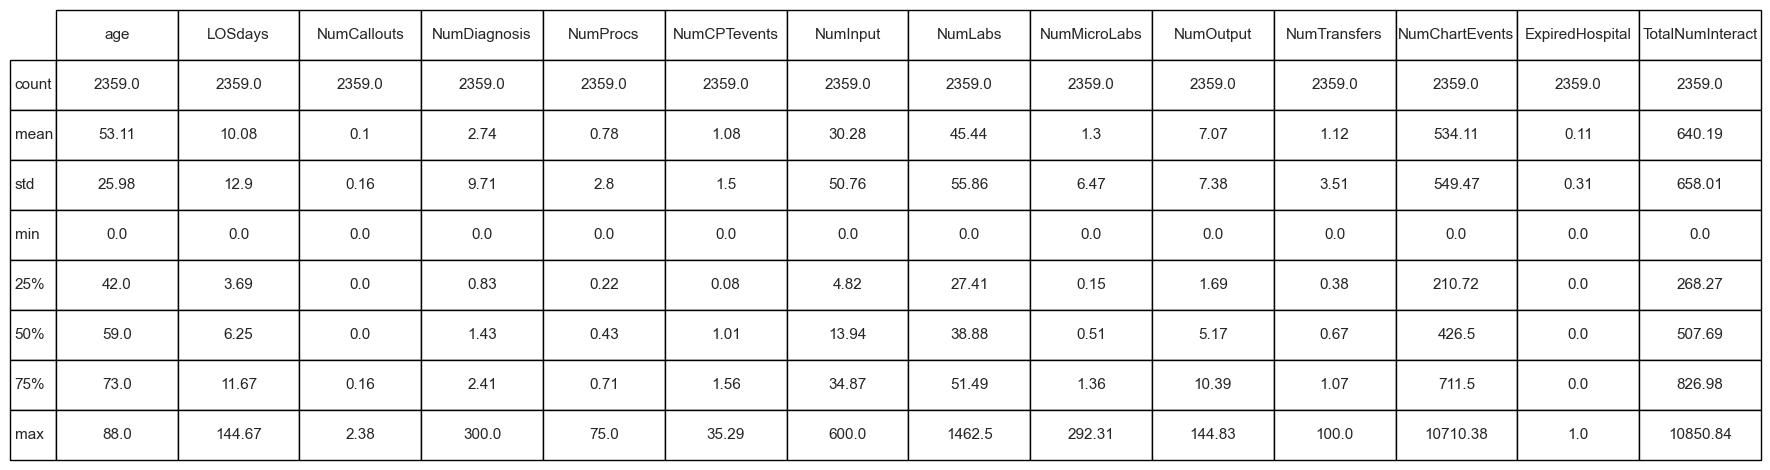

In [33]:
# Nicer table view that we can put in the report

# Raw summary statistics (not limited decimal points)
df_summary = df.describe()

# Use Seaborn's styling
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(20, 5)) # Set your desired figsize

# Hide axes
ax.axis('off')

# Place the table on the axes
tbl = ax.table(cellText=df_summary.round(2).values,
               colLabels=df_summary.columns,
               rowLabels=df_summary.index,
               cellLoc='center',
               loc='center')

# Play with the table's properties to make it more appealing
tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1.1, 3.0) # Play with these values for table size

plt.show()

<strong>Age</strong>

Average age of patients was 53 years old.

Youngest patient was 0 (likely representing newborn patients born at the hospital.).

Oldest patient was 88 years old.

The interquartile range shows that a majority of our patients were between the age of 42 to 73 years old, so the demographic of our admitted patients are skewed towards the elder population.

<strong>LOSdays</strong>

Average length of admission is 10 days.

Interquartile range for length of admission is between 3 to 11 days.

Longest amount of days admitted was 144 days. (Big outlier)

<strong>NumDiagnosis</strong>

Average number of diagnosis was 2.7.

Interquartile range of number of diagnosis was 0.8 to 2.4 per patient.

Largest amount was 300. This is an outlier, possibly representing a patient with a complex disorder?

<h3>Flagged Issue</h3>

Several attributes which is expected to be an integer/whole number are floating point values, for example number of diagnosis are floating point numbers, would expect these to be integer numbers as I don't think you can have *half* a diagnosis? Would need to consult with client on how this data was collected and entered.

A list of attributes that demonstrate this issue are:
<ul>
    <li>NumDiagnosis</li>
    <li>NumProcs</li>
    <li>NumCPTevents</li>
    <li>NumLabs</li>
    <li>NumMicroLabs</li>
    <li>NumOutput</li>
    <li>NumTransfers</li>
    <li>NumChartEvents</li>
    <li>TotalNumInteract</li>
</ul>

<h3>For further analysis</h3>
<strong>Expired Hospital</strong>

Will have to modify dataset to visualise amount of deaths at the hospital.

Furthermore would be useful to graph deaths with other attributes such as age, number of diagnosis, CPT events and interactions with healthcare professionals for potential insight on causes or indicators of deaths to see if they can be prevented.

<b>Investigating Flagged Issue</b>

In [34]:
# Scatterplot

plt.figure(figsize=(15,10))
for i, column in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    plt.scatter(range(len(df[column])), df[column], alpha=0.5)
    plt.title(column)
    plt.ylabel('Value')
    plt.xlabel('Index')
    
plt.tight_layout()
plt.show()

NameError: name 'attributes' is not defined

<Figure size 1500x1000 with 0 Axes>

Too big

In [ ]:
for column in attributes:
    float_count = df[df[column] != df[column].astype(int)].shape[0]
    print(f"{column} has {float_count} rows with float values.")


NameError: name 'attributes' is not defined

In [ ]:
for column in attributes:
    float_entries = df[df[column] != df[column].astype(int)][column]
    if not float_entries.empty:
        print(f"Statistics for float values in {column}:\n{float_entries.describe()}\n")

NameError: name 'attributes' is not defined

In [ ]:
sample_df = df.sample(n=10)  # Adjust the sample size as needed.

# You can then plot boxplots/histograms for this sample.
sample_df = df.sample(n=1000)  # Adjust the sample size as needed.

# Plot scatter plots for the sample data
plt.figure(figsize=(15,10))
for i, column in enumerate(attributes, 1):
    plt.subplot(3, 3, i)
    plt.scatter(range(len(sample_df[column])), sample_df[column], alpha=0.5)
    plt.title(column)
    plt.ylabel('Value')
    plt.xlabel('Index')
    
plt.tight_layout()
plt.show()

NameError: name 'attributes' is not defined

<Figure size 1500x1000 with 0 Axes>

<h2>Exploring specific attributes</h2>

In [ ]:
# Show the top 10 largest values for LOSdays
df.sort_values(by='LOSdays', ascending=False).head(10)

,gender,age,LOSdays,admit_location,AdmitDiagnosis,insurance,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumOutput,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,marital status
879,F,0,144.67,CLINIC REFERRAL/PREMATURE,NEWBORN,Private,0.00,0.06,0.09,Insert endotracheal tube,0.00,34.02,10.22,0.20,1.76,0.03,895.90,0,943.51,LIFE PARTNER
1463,F,0,140.50,CLINIC REFERRAL/PREMATURE,NEWBORN,Medicaid,0.00,0.06,0.04,Unilat ing hern rep NOS,0.00,27.47,9.44,0.29,1.51,0.08,819.35,0,858.28,LIFE PARTNER
1205,F,0,138.29,CLINIC REFERRAL/PREMATURE,NEWBORN,Private,0.00,0.12,0.08,Insert endotracheal tube,0.00,23.14,5.92,0.18,1.71,0.07,525.44,0,557.80,LIFE PARTNER
1111,M,0,134.58,CLINIC REFERRAL/PREMATURE,NEWBORN,Private,0.00,0.16,0.11,Occlude thoracic ves NEC,0.00,28.51,11.14,0.32,1.82,0.04,868.06,0,911.32,LIFE PARTNER
277,M,47,131.96,TRANSFER FROM HOSP/EXTRAM,PULMONARY EMBOLISM;SUBDURAL HEMATOMA,Medicaid,0.03,0.14,0.10,Other brain excision,0.21,3.39,11.95,0.71,1.84,0.07,162.55,0,183.12,SINGLE
1902,M,46,126.21,PHYS REFERRAL/NORMAL DELI,PANCYTOPENIA,Private,0.01,0.11,0.10,Destruc hepatic les NEC,1.07,6.74,31.27,3.12,2.03,0.03,96.03,0,144.25,SINGLE
2184,F,37,112.83,TRANSFER FROM HOSP/EXTRAM,END STAGE LIVER DISEASE,Private,0.02,0.13,0.22,Liver transplant NEC,1.52,1.24,38.23,0.65,1.83,0.13,62.86,0,111.49,SINGLE
509,F,0,111.00,CLINIC REFERRAL/PREMATURE,NEWBORN,Private,0.00,0.20,0.16,Cont inv mec ven 96+ hrs,0.00,19.80,9.68,0.10,1.66,0.04,758.65,0,791.42,LIFE PARTNER
613,F,24,92.96,EMERGENCY ROOM ADMIT,HEPATIC FAILURE,Medicaid,0.01,0.18,0.19,Revision of tracheostomy,3.28,62.54,63.55,1.65,9.78,0.05,1323.46,0,1473.56,SINGLE
2268,M,0,90.25,PHYS REFERRAL/NORMAL DELI,NEWBORN,Private,0.00,0.11,0.13,Insert endotracheal tube,0.00,24.76,5.84,0.28,1.81,0.06,777.20,0,811.38,LIFE PARTNER


<Strong>Comments for top 10 LOSdays</strong>

Most of them are newborns, referred from a clinic. Most newborns in the top 10 had premature births, likely indicative of complex conditions that required a longer hospital stay.

Non infant patients in the top 10 seem to have undergone complex surgical procedures, thus requiring a longer recovery time.

Most non infant patients were external transfers from hospital, likely surgical department, only one was from the ER.

<strong>Further analysis should examine the relationship between LOS days, age, admit diagnosis and expiry to try find out the main reason for larger admission days and what the effect is on patient recovery.</strong>

In [ ]:
# Show the top 10 largest values for NumDiagnosis
df.sort_values(by='NumDiagnosis', ascending=False).head(10)

,gender,age,LOSdays,admit_location,AdmitDiagnosis,insurance,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumOutput,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,marital status
1711,M,61,0.04,PHYS REFERRAL/NORMAL DELI,ESOPHAGEAL STRICTURE/SDA,Private,0.0,300.00,75.00,Esophageal dilation,25.00,0.00,0.00,0.00,0.00,75.00,0.00,0,1750.00,MARRIED
358,M,0,0.04,CLINIC REFERRAL/PREMATURE,NEWBORN,Medicaid,0.0,250.00,75.00,Insert endotracheal tube,0.00,125.00,850.00,25.00,0.00,75.00,2275.00,0,6800.00,LIFE PARTNER
1883,M,55,0.08,EMERGENCY ROOM ADMIT,ALTERED MENTAL STATUS,Medicare,0.0,137.50,37.50,Cont inv mec ven <96 hrs,25.00,0.00,1462.50,25.00,0.00,25.00,6050.00,1,8568.75,MARRIED
2103,M,84,0.17,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Medicare,0.0,82.35,5.88,Venous cath NEC,5.88,41.18,435.29,17.65,17.65,11.76,1605.88,1,2519.34,MARRIED
1560,F,79,0.42,EMERGENCY ROOM ADMIT,MENTAL STATUS CHANGES;ACIDOSIS,Medicare,0.0,66.67,9.52,Cont inv mec ven <96 hrs,7.14,445.24,478.57,0.00,2.38,4.76,2402.38,1,3557.92,SINGLE
645,M,24,0.17,CLINIC REFERRAL/PREMATURE,TRAUMA,Medicaid,0.0,64.71,17.65,Cont inv mec ven <96 hrs,35.29,235.29,452.94,11.76,5.88,11.76,2305.88,1,3573.69,LIFE PARTNER
411,M,70,0.13,CLINIC REFERRAL/PREMATURE,UGIB,Private,0.0,61.54,7.69,Cont inv mec ven <96 hrs,15.38,238.46,569.23,7.69,0.00,23.08,2284.62,1,3531.38,SEPARATED
1718,F,51,0.13,EMERGENCY ROOM ADMIT,HYPOTENSION,Medicare,0.0,61.54,0.00,na,7.69,38.46,415.38,292.31,7.69,30.77,1584.62,1,3130.15,SINGLE
1656,M,61,0.21,EMERGENCY ROOM ADMIT,UNRESPONSIVE,Self Pay,0.0,52.38,9.52,Insert endotracheal tube,19.05,280.95,785.71,9.52,9.52,9.52,1757.14,1,3218.12,LIFE PARTNER
1726,F,0,0.04,PHYS REFERRAL/NORMAL DELI,NEWBORN,Private,0.0,50.00,50.00,Insert endotracheal tube,0.00,25.00,0.00,0.00,25.00,100.00,1600.00,0,4350.00,LIFE PARTNER


<Strong>Comments for top 10 NumDiagnosis</strong>

70% of the top 10 patients with largest value for numDiagnosis expired at hospital.

Most patients were from the emergency room

These patients were all admitted for less then a day, most of them passed away. It is possible that the high number of diagnosis were previously existing on patient eMR's and/or were all made upon admission due to patients having critical, complex medical conditions (which could also explain the high fatality rate).


<strong>Further analysis should examine the relationship between num of diagnosis, expiry, LOS days and admitdiagnosis to see if there is a relationship explaining the high fatality rate we see here for potential interventions.</strong>

<h2>Correlations between attributes</h2>

In [35]:
# Correlation between all attributes in the dataframe
df.corr()

C:\Users\elena\AppData\Local\Temp\ipykernel_22536\111026739.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumOutput,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract
age,1.000000,-0.033025,0.161231,0.003143,-0.022032,0.190676,0.113275,0.150550,0.030889,0.295188,-0.101979,0.128538,0.154080,0.127804
LOSdays,-0.033025,1.000000,-0.204789,-0.131930,-0.105078,-0.042340,0.078818,-0.104501,-0.030891,0.003677,-0.150838,0.063014,0.020745,0.036343
NumCallouts,0.161231,-0.204789,1.000000,0.045462,-0.052321,0.113452,-0.151014,0.010819,-0.004732,-0.018866,0.000874,0.009109,-0.123356,-0.002741
NumDiagnosis,0.003143,-0.131930,0.045462,1.000000,0.874762,0.509908,0.083015,0.535620,0.221823,-0.009021,0.781260,0.210164,0.103296,0.360162
NumProcs,-0.022032,-0.105078,-0.052321,0.874762,1.000000,0.400051,0.156273,0.474263,0.089600,0.075425,0.852218,0.265747,0.103123,0.419478
NumCPTevents,0.190676,-0.042340,0.113452,0.509908,0.400051,1.000000,0.259270,0.585642,0.232689,0.203890,0.293443,0.405769,0.296599,0.464366
NumInput,0.113275,0.078818,-0.151014,0.083015,0.156273,0.259270,1.000000,0.476357,0.115638,0.623768,0.055945,0.651933,0.445351,0.686398
NumLabs,0.150550,-0.104501,0.010819,0.535620,0.474263,0.585642,0.476357,1.000000,0.319314,0.326127,0.378327,0.549277,0.346792,0.662861
NumMicroLabs,0.030889,-0.030891,-0.004732,0.221823,0.089600,0.232689,0.115638,0.319314,1.000000,0.107501,0.243807,0.183284,0.158598,0.238708
NumOutput,0.295188,0.003677,-0.018866,-0.009021,0.075425,0.203890,0.623768,0.326127,0.107501,1.000000,0.033526,0.680269,0.296621,0.665836


<strong>Interpeting the output</strong>

This function returns the pairwise correlation between each attribute in the dataset.

A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and values close to 0 indicate weak or no linear correlation.

<strong>Comments on correlations</strong>

Since it is a bit hard to interpret the correlation matrix from the above table, below we will visualise it with a heatmap.

C:\Users\elena\AppData\Local\Temp\ipykernel_22536\2986141776.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


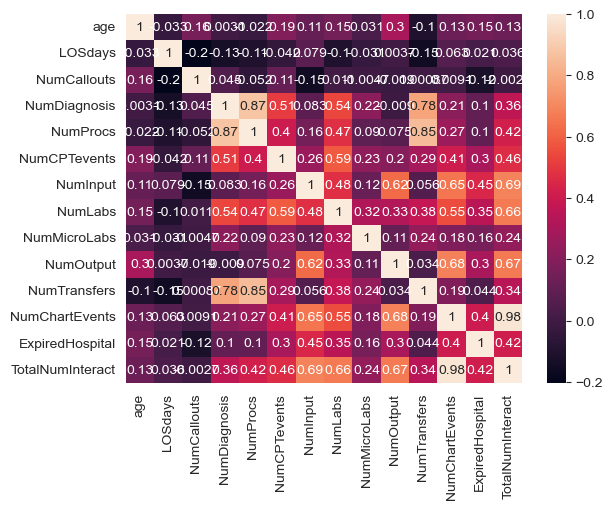

In [36]:
# Seaborn heat map to display the above correlations
sns.heatmap(df.corr(), annot = True)

plt.rcParams['figure.figsize'] = (10, 10)   # Resizing the plot

plt.show()

Lighter = Highly correlated

Dark purple = No correlation

Dark to black = Negative correlation



<h3> Comments on Correlations by Heatmap </h3>

<b>General Guidelines for Assessing Correlation Coefficients</b>
<ul>
    <li>0.00 to 0.19: Very weak</li>
    <li>0.20 to 0.39: Weak</li>
    <li>0.40 to 0.59: Moderate</li>
    <li>0.60 to 0.79: Strong</li>
</ul>

In [37]:
# Lets have a look at all strongly correlated pairs
corr_matrix = df.corr()
strongly_correlated_pairs = corr_matrix[(corr_matrix > 0.60) & (corr_matrix < 0.99)]

print("\nStrongly Correlated Pairs:")
print(strongly_correlated_pairs.stack())



Strongly Correlated Pairs:
NumDiagnosis      NumProcs            0.874762
                  NumTransfers        0.781260
NumProcs          NumDiagnosis        0.874762
                  NumTransfers        0.852218
NumInput          NumOutput           0.623768
                  NumChartEvents      0.651933
                  TotalNumInteract    0.686398
NumLabs           TotalNumInteract    0.662861
NumOutput         NumInput            0.623768
                  NumChartEvents      0.680269
                  TotalNumInteract    0.665836
NumTransfers      NumDiagnosis        0.781260
                  NumProcs            0.852218
NumChartEvents    NumInput            0.651933
                  NumOutput           0.680269
                  TotalNumInteract    0.977825
TotalNumInteract  NumInput            0.686398
                  NumLabs             0.662861
                  NumOutput           0.665836
                  NumChartEvents      0.977825
dtype: float64


C:\Users\elena\AppData\Local\Temp\ipykernel_22536\752558941.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<b>Comment</b>
- NumDiagnosis & NumProcs: They have a very high positive correlation (0.874762), which suggests that as the number of diagnoses for a patient increases, the number of procedures they undergo also tends to increase.

- NumTransfers with both NumDiagnosis & NumProcs: Patients with a higher number of transfers tend to have both more diagnoses and procedures. This might suggest that complicated cases requiring more procedures and diagnoses often need to be transferred more.

- NumInput, NumOutput, & NumChartEvents: These features are all inter-correlated, which might imply that as more inputs (like medications, fluids, etc.) are given, outputs (like urine output, drainage, etc.) are monitored more frequently and perhaps more events are charted.

- TotalNumInteract: This seems to be a cumulative or composite feature, as it's highly correlated with several other features, most notably with NumChartEvents (correlation of 0.977825).

<h1>Data Preprocessing</h1>

<h2>Binning Age</h2>

<b>
Task 1B.1: Use the following binning techniques to smooth the values of the "age” attribute:
- Equi-width binning
- Equi-depth binning.
</b>


<h3>Analysis of Age prior to Binning</h3>

<b>Methods employed</b>

- Descriptive statistics, Mode and Outlier
- Histogram
- Boxplot
- Kernel Density Estimation

In [38]:
# Before we bin age, lets see what an analysis without binning would look like

# Descriptive statistics of age
print(df['age'].describe())

count    2359.000000
mean       53.108944
std        25.984426
min         0.000000
25%        42.000000
50%        59.000000
75%        73.000000
max        88.000000
Name: age, dtype: float64


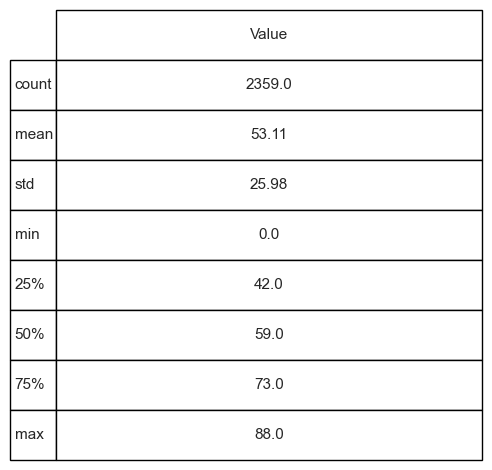

In [39]:
# Nicer table view that we can put in the report

# Descriptive statistics of age
desc = df['age'].describe()

# Use Seaborn's styling
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(5, 1)) # Set your desired figsize

# Hide axes
ax.axis('off')

# Place the table on the axes
tbl = ax.table(cellText=desc.round(2).values.reshape(-1, 1),  # reshape to 2D array
               colLabels=['Value'],  # Single column for the values
               rowLabels=desc.index,
               cellLoc='center',
               loc='center')

# Play with the table's properties to make it more appealing
tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1.1, 3.0) # Play with these values for table size

plt.show()

<b>Comment:</b>

Age centralises around the age of 53 years old.

The dataset is divided in two at 59 years old. Half are older and half are younger.

Most patients are between the ages of 42 and 73 years old.

In [40]:
# Who is our largest age group?

first_mode = df['age'].mode().iloc[0]
print(first_mode)

0


In [41]:
# Now lets lok for outliers

# Calculate Q1, Q3, and IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")


Number of outliers detected: 0


<b>Comment:</b>

Our largest age group are newborns!

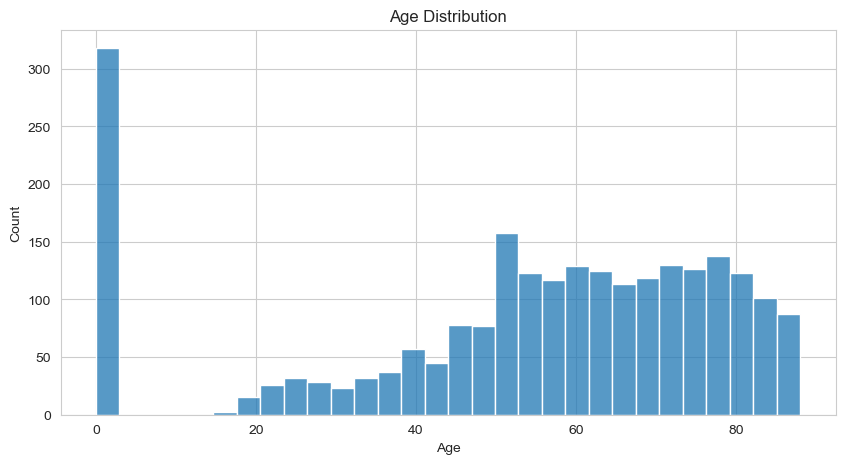

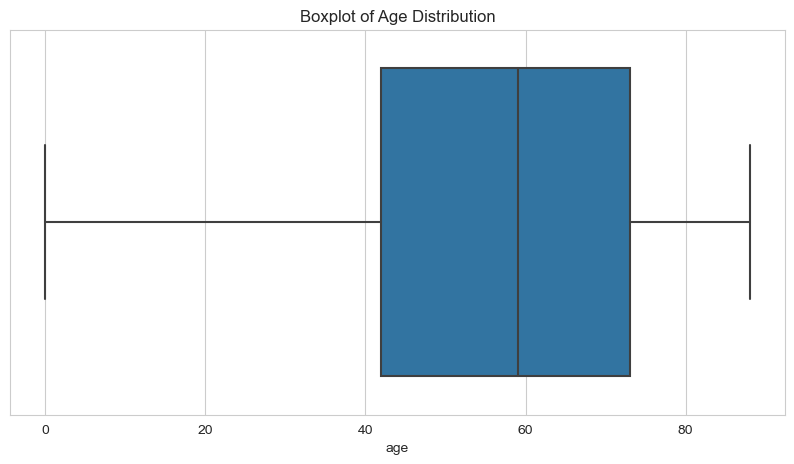

C:\Users\elena\AppData\Local\Temp\ipykernel_22536\2719310855.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True)


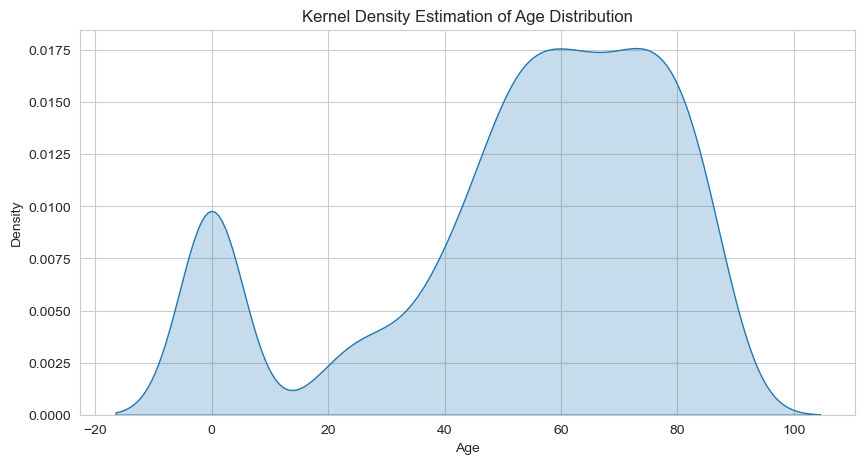

In [42]:
# Lets visualise age distribution

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=False, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age Distribution')
plt.show()

# KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(df['age'], shade=True)
plt.title('Kernel Density Estimation of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

<b>Comment:</b>

Histogram: Newborns make up our largest number of people. However the remainder of our population is bulked as elder/old people. Meanwhile teenagers and elder adults make up the minority of our population.

KDE: Patients at this hospital are mostly newborns. middle aged and elderly people. Young adults make up the minority of the patients in the hospital.

<h3>Analysis of Age AFTER Equi-width binning</h3>

<b>A quick note on justifying our binning</b>

- There was a clear peak at age 0, didn't need binning to interpret that
- We do know there is a concentration also among older people, however we don't exactly have a clear interpretation on which "sub-group(s)" of older people has the largest concentration(s)

So lets bin our ages by decade's so we can get answers such as "e.g., people in 70's are our common elder population".

In [43]:
# Smoothing with Equi-wdith binning

# Bins are by decades, the range is from our minimum age of 0 to 88 (rounding up to 90 for cleanliness)
bins = list(range(0, 91, 10))  # Creates a list [0, 10, 20, ..., 90]

labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# Creating a binned attribute into our dataframe
df['age_equiwidth_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)  # right=False makes the interval left-closed

# Displaying the original age and its corresponding bin
print(df[['age', 'age_bin']].head()) 


KeyError: "['age_bin'] not in index"

Now that we've established our equi-width binning rationale, let us now see how the graphs look now.

In [44]:
# Lets see how many people are in each bin
age_bin_counts = df['age_equiwidth_bin'].value_counts().sort_index().reset_index()
age_bin_counts.columns = ['Age Bin', 'Count']
print(age_bin_counts)


  Age Bin  Count
0     0-9    318
1   10-19      9
2   20-29     94
3   30-39    109
4   40-49    240
5   50-59    441
6   60-69    410
7   70-79    427
8   80-89    311


Lets make this into a graph so it is easier for our human brains to comprehend it haha (also it is an excuse for me to play with the pretty seaborn graphs)

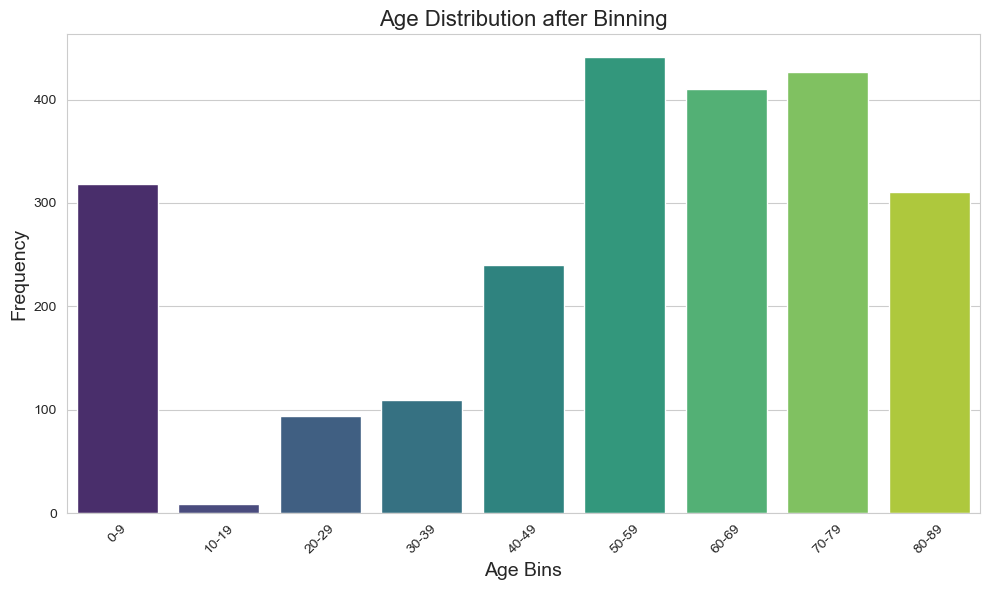

In [45]:
# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Age Bin', y='Count', data=age_bin_counts, palette="viridis")

# Adding title and labels
plt.title("Age Distribution after Binning", fontsize=16)
plt.xlabel("Age Bins", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

<b>Comments:</b>

So after binning and making another histogram (i.e. bar graph), we can see the following:

- People in their 50's (i.e. the bin that says 50-59), their 60's and 70's make up the majority of the people in our dataset

- Followed closely by newborns and people in their 80's 

<h3>Analysis of Age AFTER Equi-depth binning</h3>

In [46]:
# Smoothing with Equi-depth binning

# Creates equi-depth binned columns
df['age_equidepth_bin'] = pd.qcut(df['age'], q=5)

# Aggregate and sort the data
age_equidepth_counts = df['age_equidepth_bin'].value_counts().sort_index().reset_index()
age_equidepth_counts.columns = ['Age Bin', 'Count']

print(age_equidepth_counts)


          Age Bin  Count
0  (-0.001, 35.0]    476
1    (35.0, 53.0]    490
2    (53.0, 64.0]    456
3    (64.0, 76.0]    488
4    (76.0, 88.0]    449


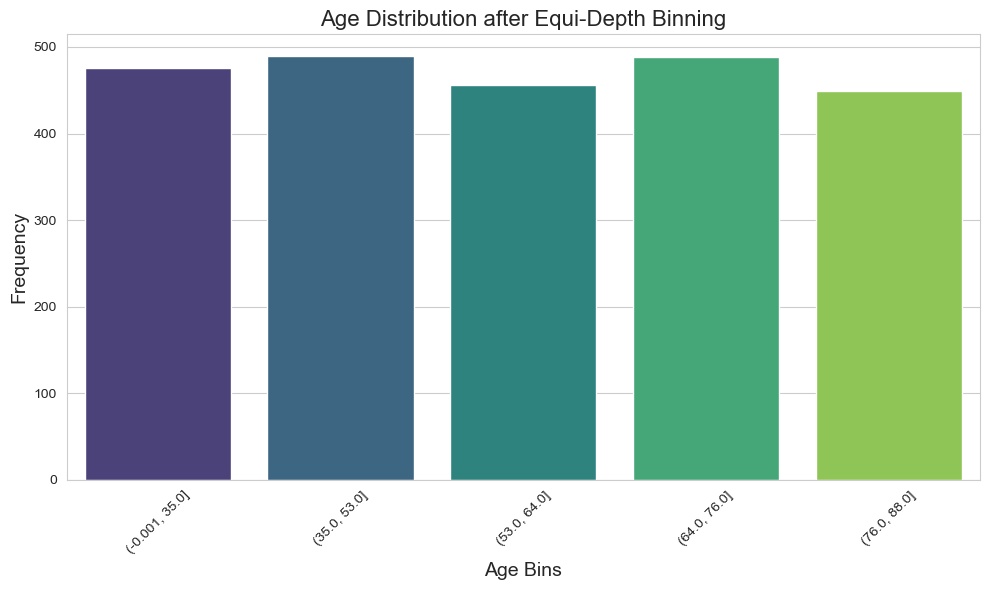

In [47]:
# Aggregate data for plotting
age_equidepth_bins = df['age_equidepth_bin'].value_counts().reset_index()
age_equidepth_bins.columns = ['Age Bin', 'Count']

# Sorting by the Age Bin for a meaningful plot
age_equidepth_bins = age_equidepth_bins.sort_values(by='Age Bin')

# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Age Bin', y='Count', data=age_equidepth_bins, palette="viridis")

# Adding title and labels
plt.title("Age Distribution after Equi-Depth Binning", fontsize=16)
plt.xlabel("Age Bins", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Lets have a look at all strongly correlated pairs
corr_matrix = df_preprocessed.corr()
strongly_correlated_pairs = corr_matrix[(corr_matrix > 0.60) & (corr_matrix < 0.99)]

print("\nStrongly Correlated Pairs:")
print(strongly_correlated_pairs.stack())



Strongly Correlated Pairs:
NumDiagnosis      NumProcs            0.874762
                  NumTransfers        0.781260
NumProcs          NumDiagnosis        0.874762
                  NumTransfers        0.852218
NumInput          NumOutput           0.623768
                  NumChartEvents      0.651933
                  TotalNumInteract    0.686398
NumOutput         NumInput            0.623768
                  NumChartEvents      0.680269
                  TotalNumInteract    0.665836
NumTransfers      NumDiagnosis        0.781260
                  NumProcs            0.852218
NumChartEvents    NumInput            0.651933
                  NumOutput           0.680269
                  TotalNumInteract    0.977825
TotalNumInteract  NumInput            0.686398
                  NumOutput           0.665836
                  NumChartEvents      0.977825
                  NumLabs_min_max     0.662861
NumLabs_min_max   TotalNumInteract    0.662861
dtype: float64


C:\Users\elena\AppData\Local\Temp\ipykernel_22536\2184012557.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_preprocessed.corr()


<b>Comments:</b>

Doesn't really seem helpful to use equi-depth binning.

<h3>Binning CSV Output</h3>

In [ ]:
# Write to Excel file
with pd.ExcelWriter('24429298.xlsx', mode='a', engine='openpyxl') as writer:  # `mode='a'` means append mode
    df[['age', 'age_equiwidth_bin', 'age_equidepth_bin']].to_excel(writer, index=False, sheet_name="Binned Data")

<h2>Normalisation</h2>

<b>
Task 1B.2: Use the following techniques to normalise the attribute "NumLabs":
- min-max normalization to transform the values onto the range [0.0-1.0].
- z-score normalization to transform the values.
</b>

Before we normalise Numlabs, let's have a look at the scale we are dealing with.

In [48]:
# Summary stats
description = df['NumLabs'].describe()
print(description)

count    2359.000000
mean       45.438588
std        55.862703
min         0.000000
25%        27.410000
50%        38.880000
75%        51.490000
max      1462.500000
Name: NumLabs, dtype: float64


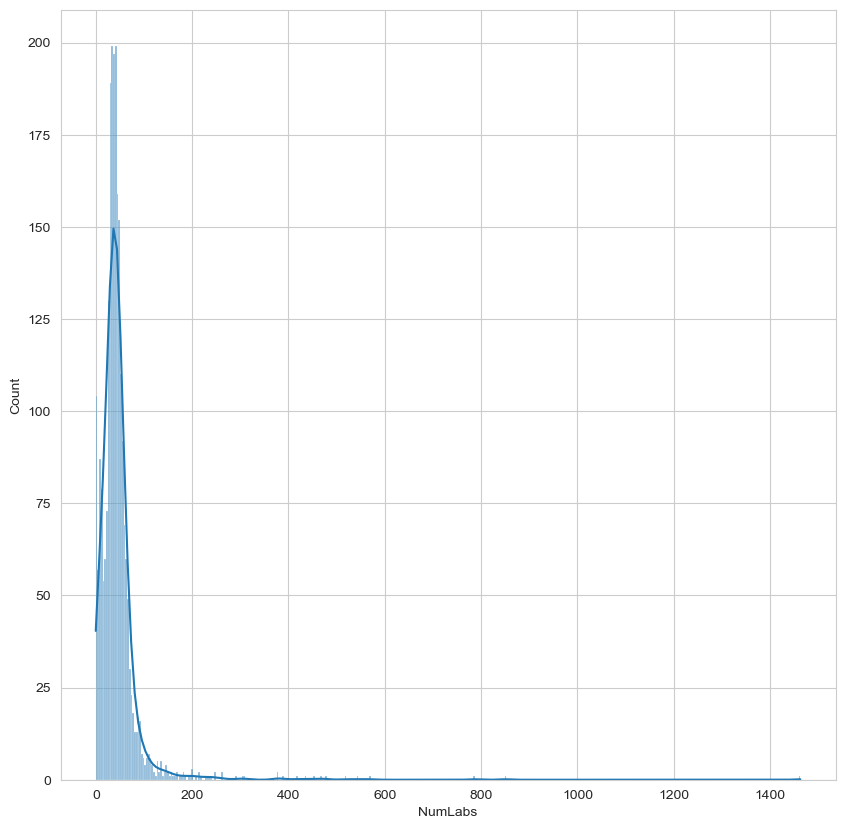

In [49]:
# Visualisation
sns.histplot(df['NumLabs'], kde=True)
plt.show()

Massive positive skew here! Our max value is 1462 which must be an outlier. Lets further check if there are any other outliers present.

In [50]:
# Checking for outliers using IQR
Q1 = df['NumLabs'].quantile(0.25)
Q3 = df['NumLabs'].quantile(0.75)
IQR = Q3 - Q1

# Bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers
outliers = df[(df['NumLabs'] < lower_bound) | (df['NumLabs'] > upper_bound)]

# Count the lower and upper outliers
lower_outliers_count = df[df['NumLabs'] < lower_bound].shape[0]
upper_outliers_count = df[df['NumLabs'] > upper_bound].shape[0]

# Display the results
print(f"Q1 (25th Percentile): {Q1}")
print(f"Q3 (75th Percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")
print("\nOutliers:")

print(f"Number of Lower Outliers: {lower_outliers_count}")
print(f"Number of Upper Outliers: {upper_outliers_count}")

print(outliers['NumLabs'])

Q1 (25th Percentile): 27.41
Q3 (75th Percentile): 51.489999999999995
IQR: 24.079999999999995
Lower Bound for Outliers: -8.70999999999999
Upper Bound for Outliers: 87.60999999999999

Outliers:
Number of Lower Outliers: 0
Number of Upper Outliers: 139
6        99.64
16      112.33
23       90.48
26      155.56
31       88.83
         ...  
2243    114.93
2276    104.91
2301    109.17
2316    116.17
2323    109.02
Name: NumLabs, Length: 139, dtype: float64


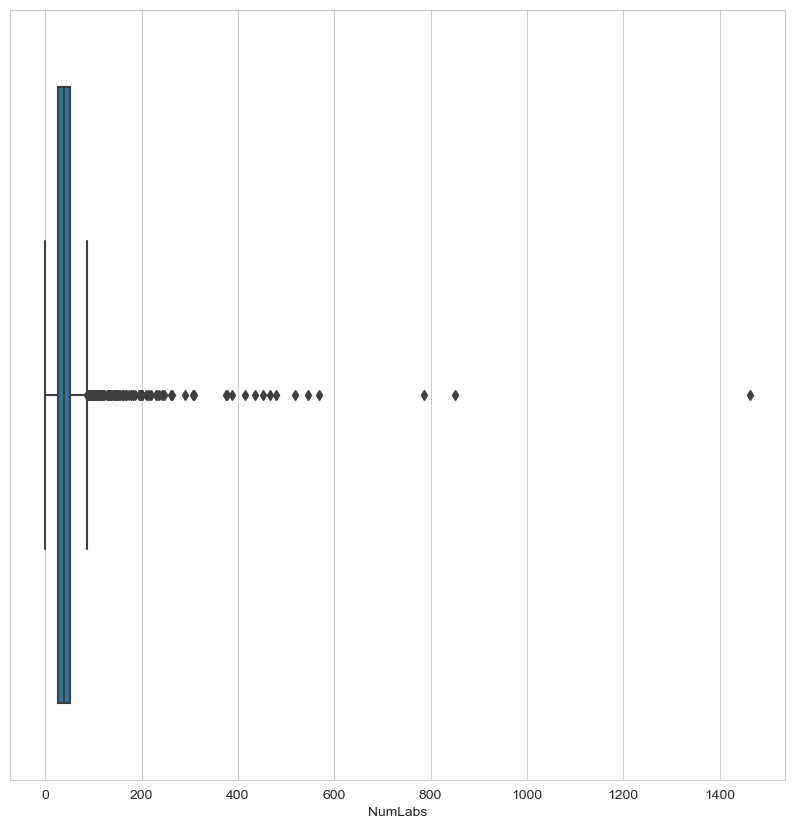

In [51]:
# Box and whisker plot

sns.boxplot(x=df['NumLabs'])
plt.show()

So we have 139 records that are above the upper IQR range.

Due to the nature of our data, our 139 outliers are likely representative of patients having medical cases with complex needs and thus requiring more diagnostic tests.

However it can also be indicative of miscommunication between healthcare professionals resulting in over-ordering of tests.

Further investigation for this would involve:
- Examining admit_diagnosis 
- Examining length of stay
- Examining number of diagnoses

Given we have 139 outliers above the upper boundary of our IQR yet the majority of our 2000+ patients are within the IQR, this would affect any clustering investigations we do, thus we will have to normalise numLabs prior to clustering.

If we visualise data with attributes of differing magnitudes in a scatter plot, the axis with the larger magnitude might stretch out, making clusters or patterns in the other attributes harder to discern.

In [52]:
# Normalisation libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<b>Min-Max Normalisation</b>

      NumLabs  NumLabs_min_max
0       27.28         0.018653
1       53.68         0.036704
2       79.77         0.054544
3       48.63         0.033251
4       51.20         0.035009
...       ...              ...
2354     4.08         0.002790
2355    42.37         0.028971
2356    24.49         0.016745
2357    51.45         0.035179
2358    10.86         0.007426

[2359 rows x 2 columns]


Text(0.5, 1.0, 'Min-Max Normalized NumLabs Distribution')

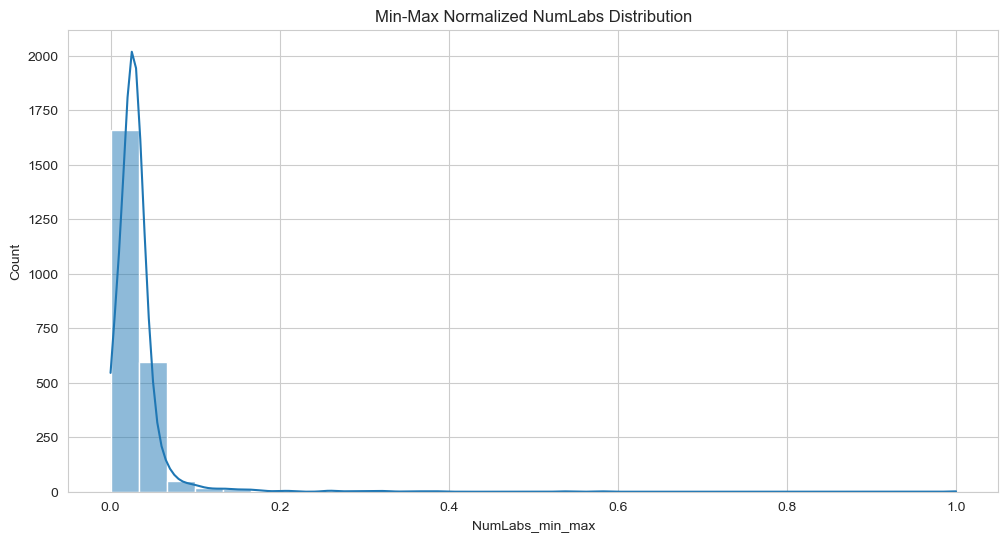

In [53]:
# SKLearn Min-Max Scaler
min_max_scaler = MinMaxScaler()
df['NumLabs_min_max'] = min_max_scaler.fit_transform(df[['NumLabs']])

# Output
print(df[['NumLabs', 'NumLabs_min_max']])

# Visualise Min-Max normalised NumLabs
plt.figure(figsize=(12, 6))
sns.histplot(df['NumLabs_min_max'], kde=True, bins=30)
plt.title('Min-Max Normalized NumLabs Distribution')


<b>Z-Score Normalisation</b>

      NumLabs  NumLabs_zscore
0       27.28       -0.325126
1       53.68        0.147561
2       79.77        0.614698
3       48.63        0.057142
4       51.20        0.103157
...       ...             ...
2354     4.08       -0.740518
2355    42.37       -0.054943
2356    24.49       -0.375081
2357    51.45        0.107633
2358    10.86       -0.619124

[2359 rows x 2 columns]


Text(0.5, 1.0, 'Z-score Normalized NumLabs Distribution')

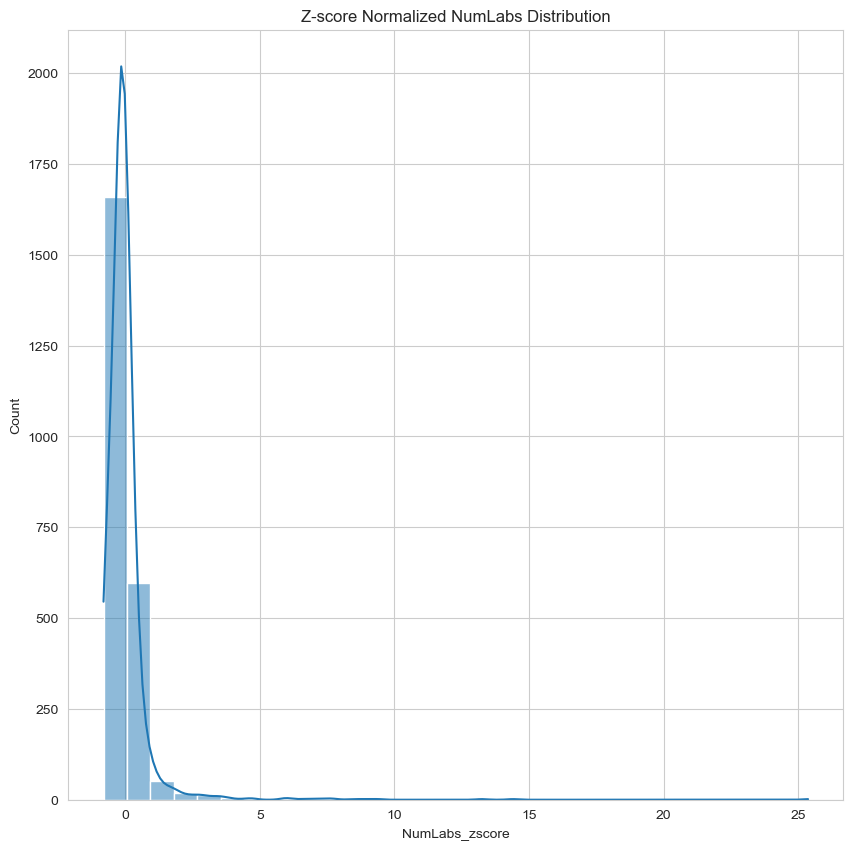

In [54]:
#SKLearn Z score scaler
standard_scaler = StandardScaler()
df['NumLabs_zscore'] = standard_scaler.fit_transform(df[['NumLabs']])

# Output
print(df[['NumLabs', 'NumLabs_zscore']])

# Visualise Z-score normalised NumLabs
sns.histplot(df['NumLabs_zscore'], kde=True, bins=30)
plt.title('Z-score Normalized NumLabs Distribution')

Raw numLabs distribution vs Normalised by Min-Max vs Normalised by Z-Score

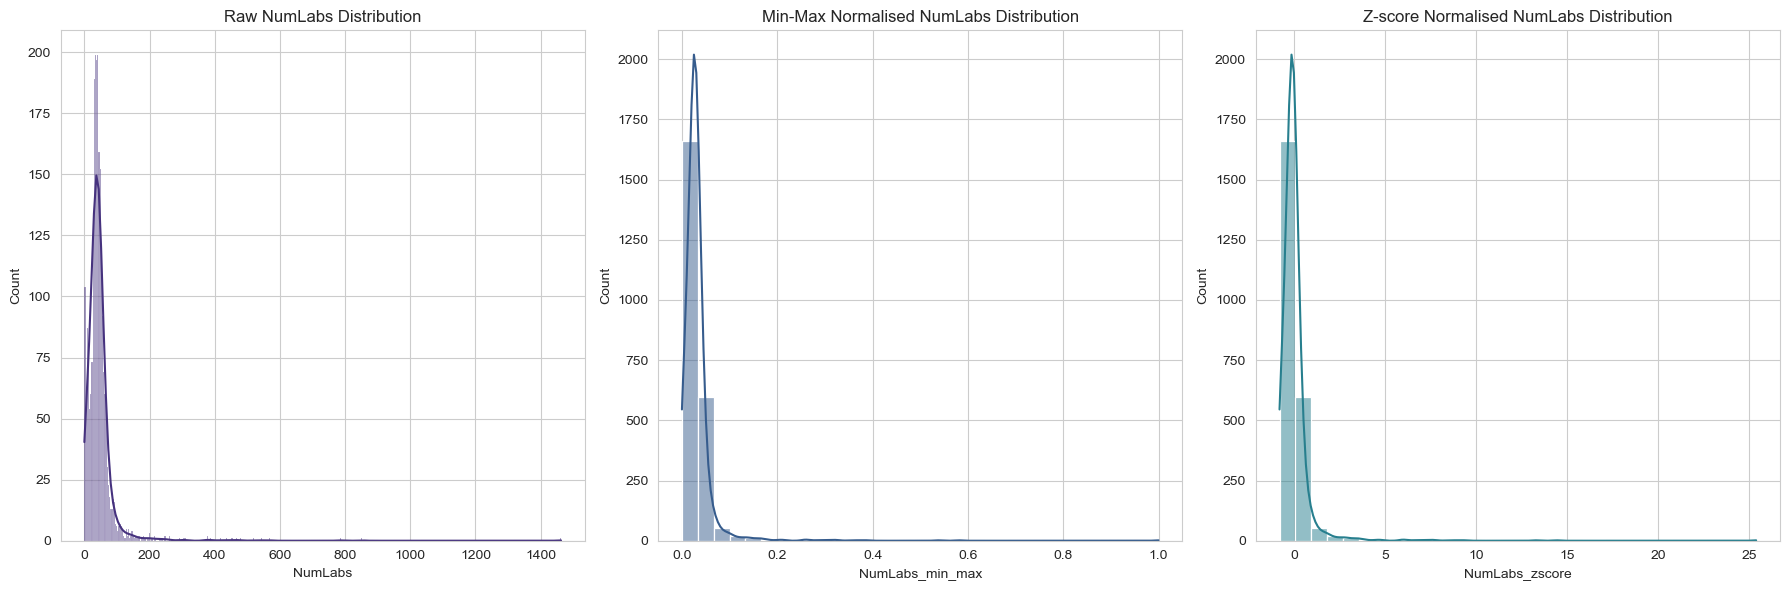

In [55]:
# Set up a subplot grid of 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Raw Visualisation
sns.histplot(df['NumLabs'], kde=True, ax=axes[0], color=sns.color_palette("viridis")[0])
axes[0].set_title('Raw NumLabs Distribution')

# Visualise Min-Max normalised NumLabs
sns.histplot(df['NumLabs_min_max'], kde=True, bins=30, ax=axes[1], color=sns.color_palette("viridis")[1])
axes[1].set_title('Min-Max Normalised NumLabs Distribution')

# Visualise Z-score normalised NumLabs
sns.histplot(df['NumLabs_zscore'], kde=True, bins=30, ax=axes[2], color=sns.color_palette("viridis")[2])
axes[2].set_title('Z-score Normalised NumLabs Distribution')

plt.tight_layout()
plt.show()

<h3>Normalisation CSV Output</h3>

In [ ]:
# Write to Excel file
with pd.ExcelWriter('24429298.xlsx', mode='a', engine='openpyxl') as writer:  # `mode='a'` means append mode
    df[['NumLabs', 'NumLabs_min_max', 'NumLabs_zscore']].to_excel(writer, index=False, sheet_name="Normalised Labs")

<h2>Discretisation</h2>

<b>Task 1B.3: Discretise the "LOSdays" attribute into the following categories: shorter periods, medium periods, longer periods and very longer periods (e.g.: shorter periods=0-5; medium periods=5-15; longer periods= 15-50; very longer periods= 50+ ). Provide the frequency of each category in your dataset.</b>

In [56]:
bins = [0, 5, 15, 50, float('inf')]
labels = ['shorter periods', 'medium periods', 'longer periods', 'very longer periods']

df['LOSdays_category'] = pd.cut(df['LOSdays'], bins=bins, labels=labels, right=False)

frequency = df['LOSdays_category'].value_counts()

print(frequency)

medium periods         1023
shorter periods         935
longer periods          358
very longer periods      43
Name: LOSdays_category, dtype: int64


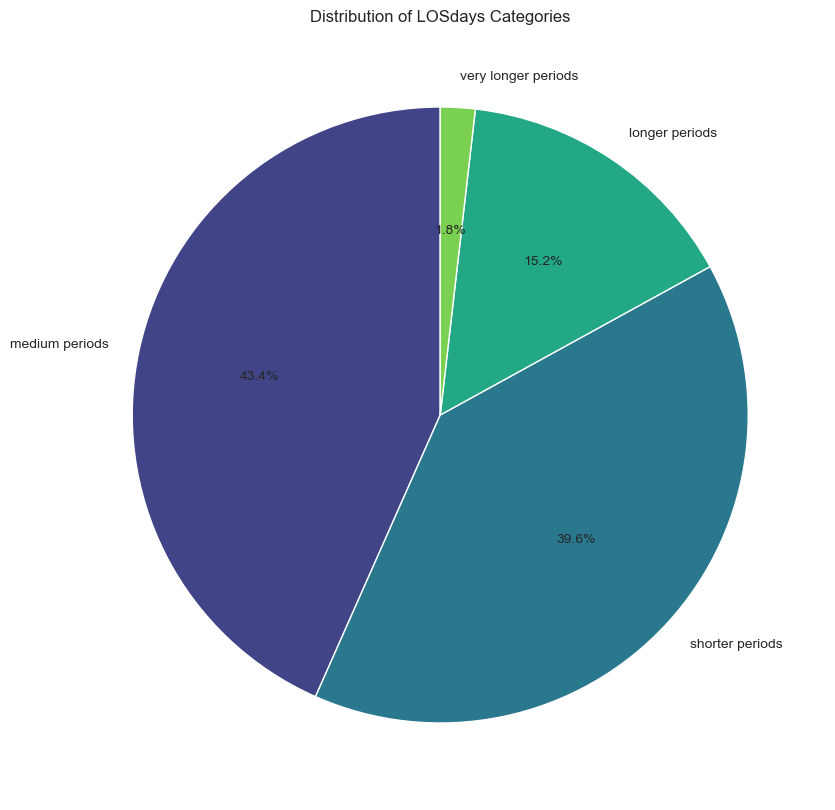

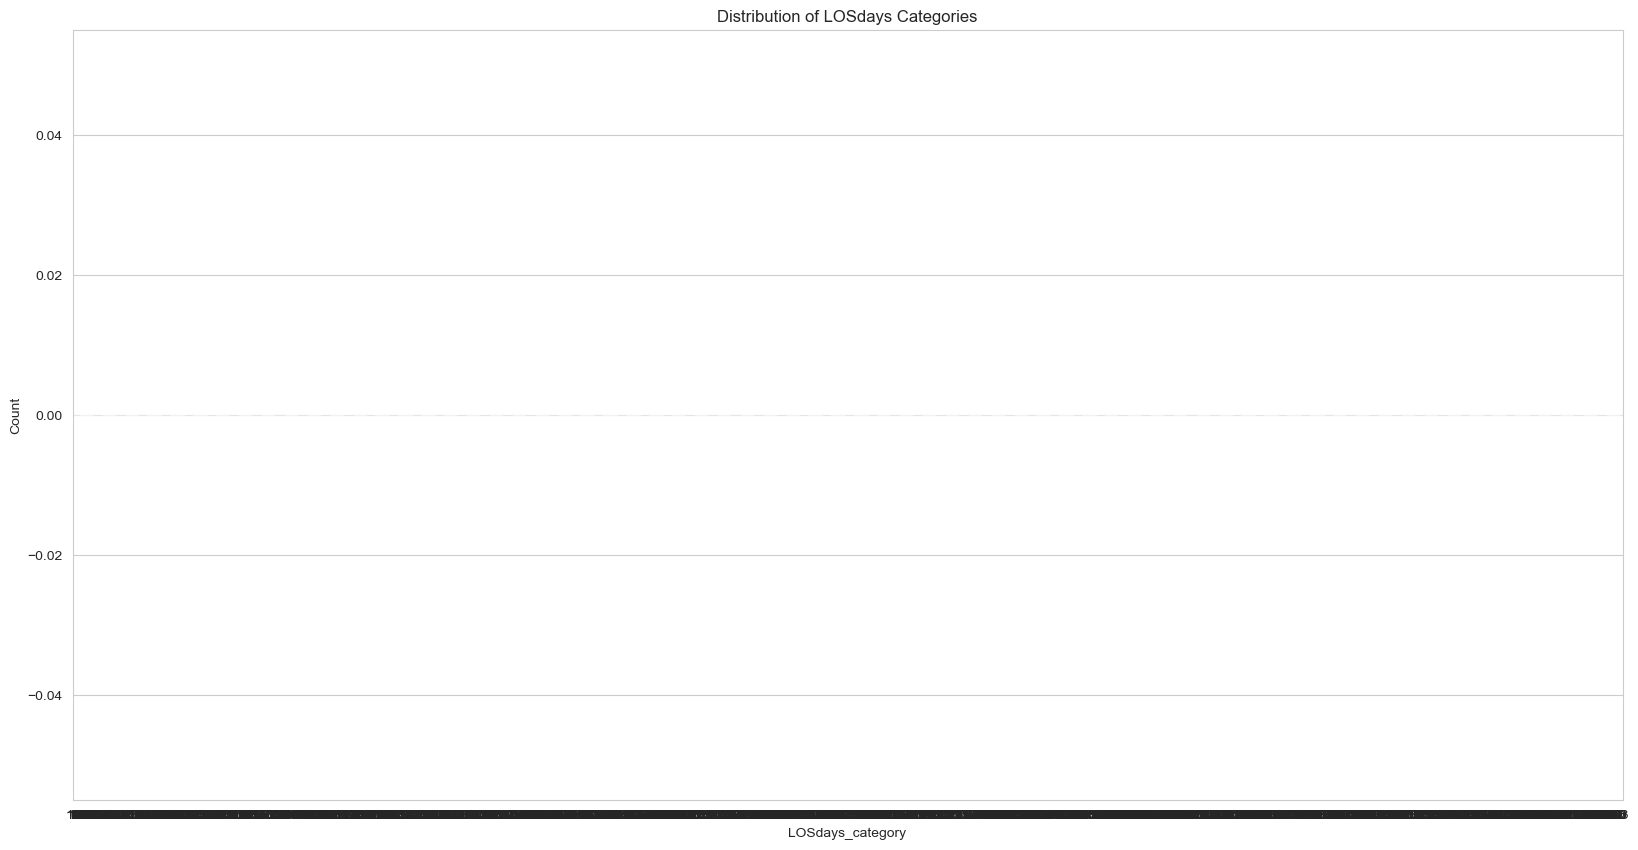

In [114]:
# Visualisation
colors = sns.color_palette("viridis", len(counts))

plt.pie(counts, labels=counts.index, startangle=90, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of LOSdays Categories')
plt.show()

sns.countplot(data=df, x='LOSdays_category', order=labels, color=sns.color_palette("viridis")[0])
plt.title('Distribution of LOSdays Categories')
plt.ylabel('Count')
plt.show()

<b>Comment</b>
Majority of patients stay for short and medium periods, where shorter periods = 1 to 5 days and medium periods = 5 to 15 days.

<h3>Discretisation CSV Output</h3>

In [ ]:
# Write to Excel file
with pd.ExcelWriter('24429298.xlsx', mode='a', engine='openpyxl') as writer:  # `mode='a'` means append mode
    df[['LOSdays','LOSdays_category']].to_excel(writer, index=False, sheet_name="Discretised LOSDays")

<h1>Binarisation</h1>

<b>Task 1B.4: Binarise the "marital status" variable [with values "0" or "1"].</b>

In [58]:
# Binarise the 'marital status' column
df['binarised_marital_status'] = df['marital status'].apply(lambda x: 1 if x == "MARRIED" else 0)

df.head()

,gender,age,LOSdays,admit_location,AdmitDiagnosis,insurance,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,...,NumChartEvents,ExpiredHospital,TotalNumInteract,marital status,age_equiwidth_bin,age_equidepth_bin,NumLabs_min_max,NumLabs_zscore,LOSdays_category,binarised_marital_status
0,M,65,10.08,TRANSFER FROM HOSP/EXTRAM,CHEST PAIN;TELEMETRY,Private,0.10,0.99,0.30,Aortocor bypas-3 cor art,...,118.06,0,170.95,MARRIED,60-69,"(64.0, 76.0]",0.018653,-0.325126,medium periods,1
1,M,84,3.67,CLINIC REFERRAL/PREMATURE,ALTERED MENTAL STATUS,Medicare,0.27,1.91,0.27,Arterial catheterization,...,440.05,0,524.27,MARRIED,80-89,"(76.0, 88.0]",0.036704,0.147561,shorter periods,1
2,M,38,3.46,TRANSFER FROM HOSP/EXTRAM,JAUNDICE,Self Pay,0.29,0.29,0.00,na,...,254.05,0,353.85,SINGLE,30-39,"(35.0, 53.0]",0.054544,0.614698,shorter periods,0
3,F,78,6.21,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE,Medicare,0.16,3.06,0.00,na,...,588.89,0,665.76,SINGLE,70-79,"(76.0, 88.0]",0.033251,0.057142,medium periods,0
4,F,58,2.50,TRANSFER FROM HOSP/EXTRAM,ASTHMA EXACERBATION,Medicare,0.00,3.60,2.00,Cont inv mec ven <96 hrs,...,740.40,0,863.84,DIVORCED,50-59,"(53.0, 64.0]",0.035009,0.103157,shorter periods,0


<h3>Binarisation CSV Output</h3>

In [ ]:
# Write to Excel file
with pd.ExcelWriter('24429298.xlsx', mode='a', engine='openpyxl') as writer:  # `mode='a'` means append mode
    df[['marital status','binarised_marital_status']].to_excel(writer, index=False, sheet_name="Binarised Marital Status")

<h1>Correlation Heatmap and Strongly Correlated Values AFTER Pre-Processing</h1>

In [62]:
# Pre-processed dataframe Columns
df_preprocessed.columns

Index(['gender', 'admit_location', 'AdmitDiagnosis', 'insurance',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'AdmitProcedure',
       'NumCPTevents', 'NumInput', 'NumMicroLabs', 'NumOutput', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract',
       'age_equiwidth_bin', 'NumLabs_min_max', 'LOSdays_category',
       'binarised_marital_status'],
      dtype='object')

In [61]:
# Pre-processed dataframe
# Note: We will only be using min-max for numlabs and equi-width for age binning.
df_preprocessed = df.drop(columns=['LOSdays','NumLabs', 'age', 'marital status', 'NumLabs_zscore', 'age_equidepth_bin'])

df_preprocessed


,gender,admit_location,AdmitDiagnosis,insurance,NumCallouts,NumDiagnosis,NumProcs,AdmitProcedure,NumCPTevents,NumInput,NumMicroLabs,NumOutput,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,age_equiwidth_bin,NumLabs_min_max,LOSdays_category,binarised_marital_status
0,M,TRANSFER FROM HOSP/EXTRAM,CHEST PAIN;TELEMETRY,Private,0.10,0.99,0.30,Aortocor bypas-3 cor art,0.99,6.55,0.20,3.37,0.50,118.06,0,170.95,60-69,0.018653,medium periods,1
1,M,CLINIC REFERRAL/PREMATURE,ALTERED MENTAL STATUS,Medicare,0.27,1.91,0.27,Arterial catheterization,1.91,4.63,1.09,9.26,0.82,440.05,0,524.27,80-89,0.036704,shorter periods,1
2,M,TRANSFER FROM HOSP/EXTRAM,JAUNDICE,Self Pay,0.29,0.29,0.00,na,0.87,7.51,2.02,4.91,0.87,254.05,0,353.85,30-39,0.054544,shorter periods,0
3,F,EMERGENCY ROOM ADMIT,CONGESTIVE HEART FAILURE,Medicare,0.16,3.06,0.00,na,1.13,5.96,0.64,8.86,0.97,588.89,0,665.76,70-79,0.033251,medium periods,0
4,F,TRANSFER FROM HOSP/EXTRAM,ASTHMA EXACERBATION,Medicare,0.00,3.60,2.00,Cont inv mec ven <96 hrs,1.60,37.60,6.80,6.40,0.80,740.40,0,863.84,50-59,0.035009,shorter periods,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,M,PHYS REFERRAL/NORMAL DELI,NEWBORN,Private,0.00,0.36,0.12,Circumcision,0.00,5.64,0.12,0.24,0.72,447.54,0,459.50,0-9,0.002790,medium periods,0
2355,M,CLINIC REFERRAL/PREMATURE,"HODGKINS, FEVER",Private,0.05,0.95,0.26,Cont inv mec ven 96+ hrs,2.16,12.68,0.79,5.00,0.26,360.74,0,433.60,40-49,0.028971,longer periods,0
2356,M,PHYS REFERRAL/NORMAL DELI,RIGHT LUNG NODULE/SDA,Private,0.26,1.79,0.26,Thorac exc lung lesion,1.28,11.22,2.55,7.65,1.79,453.83,0,522.55,70-79,0.016745,shorter periods,0
2357,M,PHYS REFERRAL/NORMAL DELI,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,Private,0.39,1.93,0.58,Aortocor bypas-2 cor art,1.93,28.63,0.19,13.54,1.16,741.59,0,864.28,50-59,0.035179,medium periods,1


In [63]:
# Correlation between all attributes in the dataframe
df_preprocessed.corr()

C:\Users\elena\AppData\Local\Temp\ipykernel_22536\1639427957.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_preprocessed.corr()


,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumMicroLabs,NumOutput,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,NumLabs_min_max,binarised_marital_status
NumCallouts,1.000000,0.045462,-0.052321,0.113452,-0.151014,-0.004732,-0.018866,0.000874,0.009109,-0.123356,-0.002741,0.010819,0.024617
NumDiagnosis,0.045462,1.000000,0.874762,0.509908,0.083015,0.221823,-0.009021,0.781260,0.210164,0.103296,0.360162,0.535620,-0.002836
NumProcs,-0.052321,0.874762,1.000000,0.400051,0.156273,0.089600,0.075425,0.852218,0.265747,0.103123,0.419478,0.474263,0.010130
NumCPTevents,0.113452,0.509908,0.400051,1.000000,0.259270,0.232689,0.203890,0.293443,0.405769,0.296599,0.464366,0.585642,0.046052
NumInput,-0.151014,0.083015,0.156273,0.259270,1.000000,0.115638,0.623768,0.055945,0.651933,0.445351,0.686398,0.476357,0.036329
NumMicroLabs,-0.004732,0.221823,0.089600,0.232689,0.115638,1.000000,0.107501,0.243807,0.183284,0.158598,0.238708,0.319314,-0.004317
NumOutput,-0.018866,-0.009021,0.075425,0.203890,0.623768,0.107501,1.000000,0.033526,0.680269,0.296621,0.665836,0.326127,0.138990
NumTransfers,0.000874,0.781260,0.852218,0.293443,0.055945,0.243807,0.033526,1.000000,0.188241,0.044120,0.342977,0.378327,-0.029172
NumChartEvents,0.009109,0.210164,0.265747,0.405769,0.651933,0.183284,0.680269,0.188241,1.000000,0.400165,0.977825,0.549277,0.045591
ExpiredHospital,-0.123356,0.103296,0.103123,0.296599,0.445351,0.158598,0.296621,0.044120,0.400165,1.000000,0.415562,0.346792,0.008482


C:\Users\elena\AppData\Local\Temp\ipykernel_22536\1403072589.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_preprocessed.corr(), annot = True)


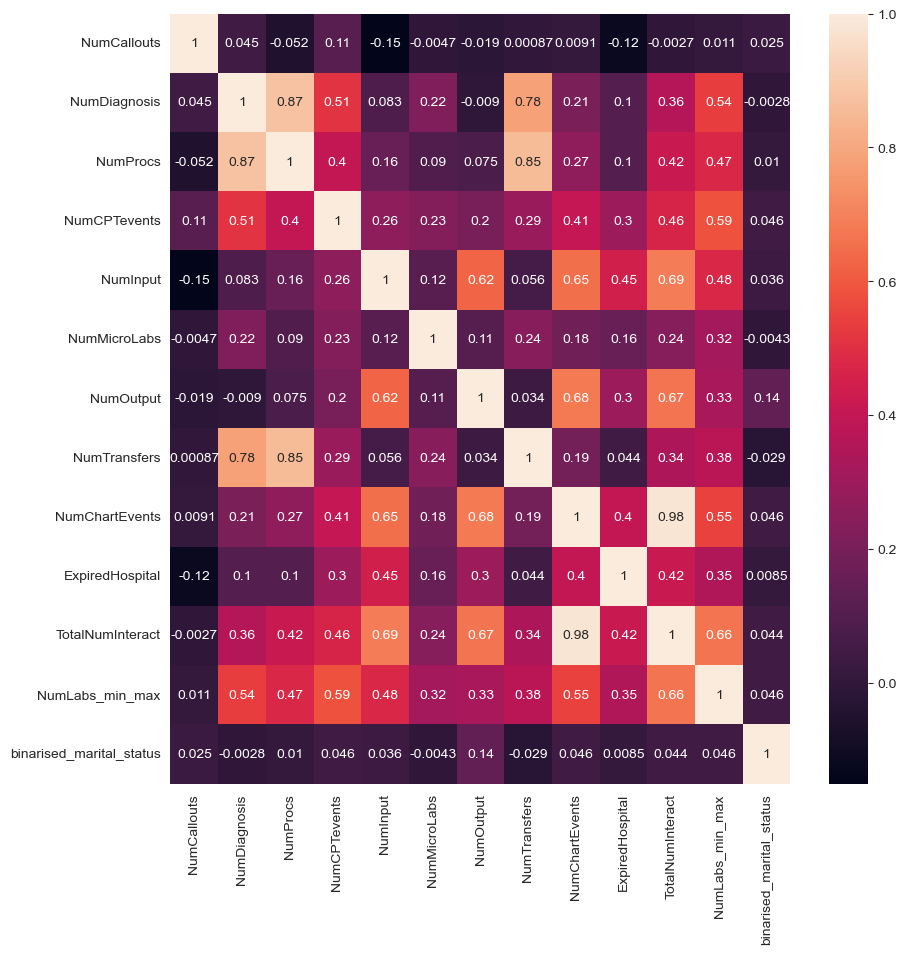

In [64]:
# Seaborn heat map to display the above correlations
sns.heatmap(df_preprocessed.corr(), annot = True)

plt.rcParams['figure.figsize'] = (20, 10)   # Resizing the plot

plt.show()

In [65]:
# Lets have a look at all strongly correlated pairs
corr_matrix = df_preprocessed.corr()
strongly_correlated_pairs = corr_matrix[(corr_matrix > 0.60) & (corr_matrix < 0.99)]

print("\nStrongly Correlated Pairs:")
print(strongly_correlated_pairs.stack())



Strongly Correlated Pairs:
NumDiagnosis      NumProcs            0.874762
                  NumTransfers        0.781260
NumProcs          NumDiagnosis        0.874762
                  NumTransfers        0.852218
NumInput          NumOutput           0.623768
                  NumChartEvents      0.651933
                  TotalNumInteract    0.686398
NumOutput         NumInput            0.623768
                  NumChartEvents      0.680269
                  TotalNumInteract    0.665836
NumTransfers      NumDiagnosis        0.781260
                  NumProcs            0.852218
NumChartEvents    NumInput            0.651933
                  NumOutput           0.680269
                  TotalNumInteract    0.977825
TotalNumInteract  NumInput            0.686398
                  NumOutput           0.665836
                  NumChartEvents      0.977825
                  NumLabs_min_max     0.662861
NumLabs_min_max   TotalNumInteract    0.662861
dtype: float64


C:\Users\elena\AppData\Local\Temp\ipykernel_22536\2184012557.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_preprocessed.corr()


<h1>Clustering</h1>

We have already normalised our data, so next is to encode our categorical data into numeric data so that our algorithm is able to perform K-means clustering.

In [72]:
# List of categorical columns to be encoded
categorical_columns = ["gender", "admit_location", "AdmitDiagnosis", "insurance", "AdmitProcedure"]  # Adjust this list based on your data

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df_preprocessed, columns=categorical_columns, drop_first=True)  # drop_first to avoid dummy variable trap

# Print the first few rows of the resulting DataFrame to check the result
print(df_encoded.head())

   NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  NumInput  NumMicroLabs  \
0         0.10          0.99      0.30          0.99      6.55          0.20   
1         0.27          1.91      0.27          1.91      4.63          1.09   
2         0.29          0.29      0.00          0.87      7.51          2.02   
3         0.16          3.06      0.00          1.13      5.96          0.64   
4         0.00          3.60      2.00          1.60     37.60          6.80   

   NumOutput  NumTransfers  NumChartEvents  ExpiredHospital  ...  \
0       3.37          0.50          118.06                0  ...   
1       9.26          0.82          440.05                0  ...   
2       4.91          0.87          254.05                0  ...   
3       8.86          0.97          588.89                0  ...   
4       6.40          0.80          740.40                0  ...   

   AdmitProcedure_368  AdmitProcedure_369  AdmitProcedure_370  \
0                   0                   0    

In [73]:
print(df_encoded.columns)

Index(['NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput',
       'NumMicroLabs', 'NumOutput', 'NumTransfers', 'NumChartEvents',
       'ExpiredHospital',
       ...
       'AdmitProcedure_368', 'AdmitProcedure_369', 'AdmitProcedure_370',
       'AdmitProcedure_371', 'AdmitProcedure_372', 'AdmitProcedure_373',
       'AdmitProcedure_374', 'AdmitProcedure_375', 'AdmitProcedure_376',
       'AdmitProcedure_377'],
      dtype='object', length=1485)


Now we will use this technique to determine how many clusters we should use in our K-means clustering algorithm given the nature of our dataset. Below we will compare the Elbow Method and the Silhouette Score.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

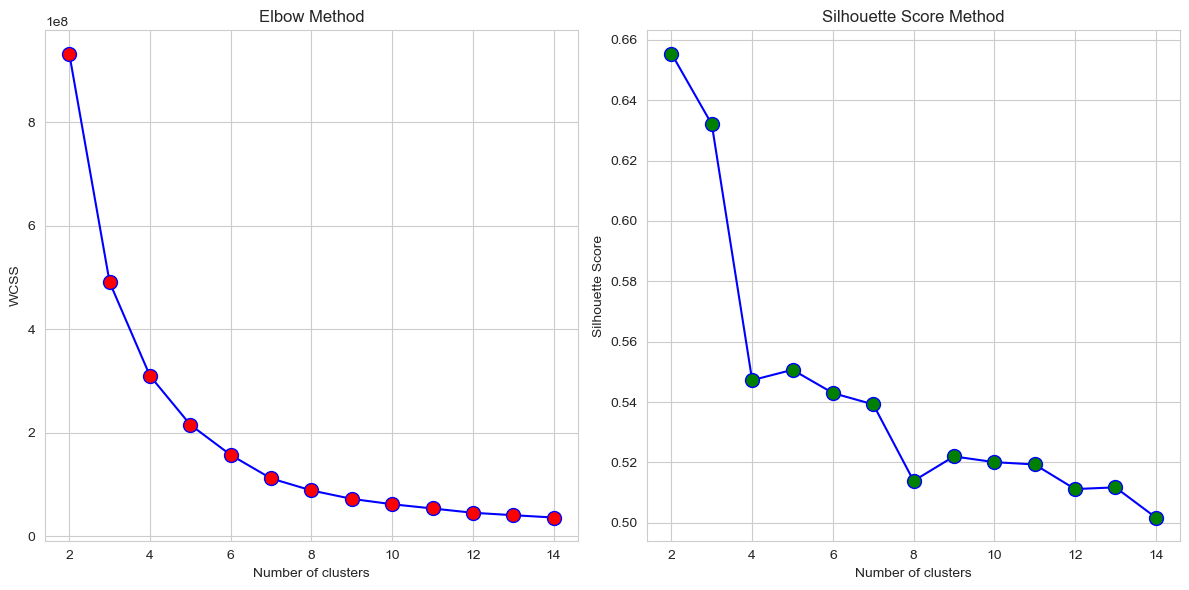

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method
wcss = []  # List to hold the within-cluster sum of squares for each number of clusters
sil_scores = []  # List to hold silhouette scores for each number of clusters
range_clusters = range(2, 15)  # Checking for up to 14 clusters. Adjust this range if needed.

for n in range_clusters:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)
    
    # Compute the silhouette scores (only reasonable for n > 1)
    labels = kmeans.labels_
    sil_scores.append(silhouette_score(df_encoded, labels))

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range_clusters, wcss, 'bo-', markerfacecolor='red', markersize=10)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range_clusters, sil_scores, 'bo-', markerfacecolor='green', markersize=10)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

<b>Elbow Graph Interpretation</b>

X-axis: Number of clusters.
    
Y-axis: Within-cluster sum of squares (WCSS), which is a measure of the compactness of the clusters. Lower values mean the data points in a cluster are closer to each other.

"Elbow" seems to occur at around 4 clusters.

<b>Silhoutte Score Graph Interpretation</b>

X-axis: Number of clusters.

Y-axis: Silhouette score, a measure of cluster cohesion and separation.

As the closer the Sillhoutte score is to 1, the better our objects are clustered, we use 2 clusters if we go by the Sillhoutte score.

<b>Clustering Plan</b>
Lets explore the use of 2, 3 and 4 clusters to see which one provides the most insight.

- Fit K-Means with kk clusters, where k is 2, 3, and 4.
- Visualize the clusters using seaborn for each k.
- It's important to note that visualization in a 2D space requires us to reduce the dimensionality of our data. A common way to do this is to use Principal Component Analysis (PCA). We'll reduce our data to 2 principal components and plot the clusters on these two components.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


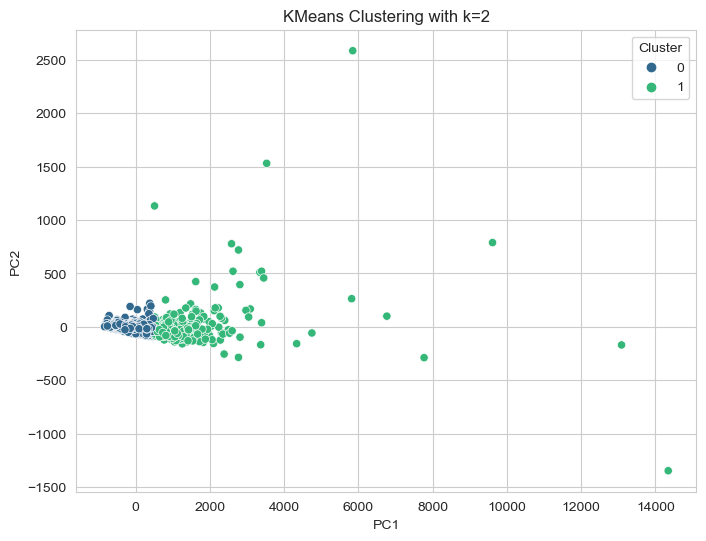

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


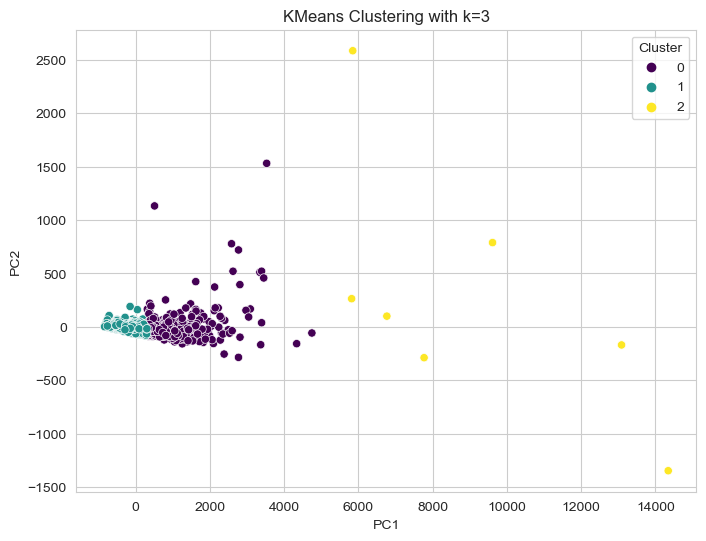

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


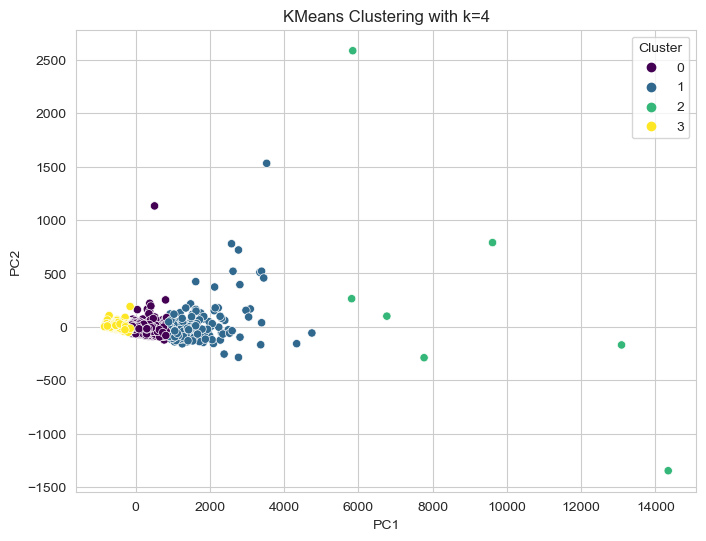

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


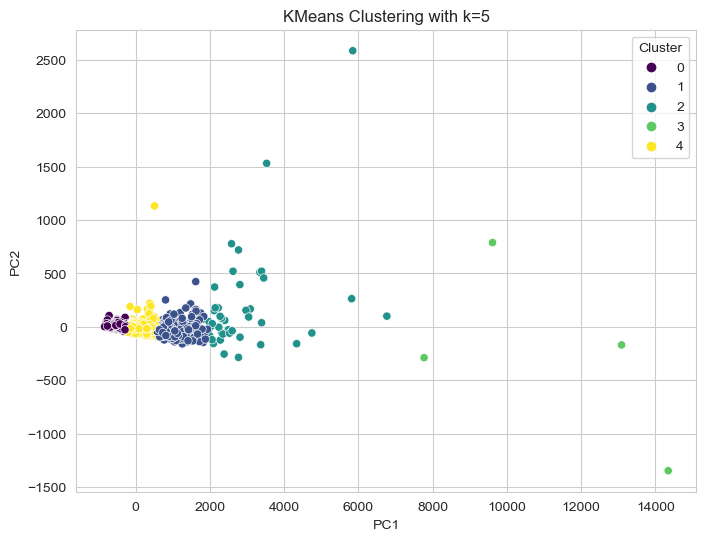

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


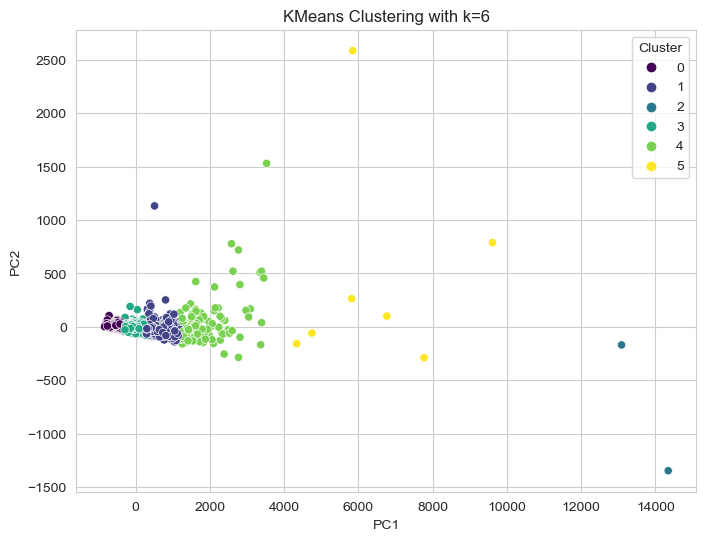

In [77]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_encoded)

# Create a DataFrame to store principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Try k = 2, 3, 4 clusters
for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_encoded)
    
    # Adding labels to our PCA-reduced dataframe
    principalDf['Cluster'] = kmeans.labels_
    
    # Visualize
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=principalDf, x='PC1', y='PC2', hue='Cluster', palette='viridis')
    plt.title(f'KMeans Clustering with k={k}')
    plt.show()

Cluster of 5 seems to make more sense given the fact that the data tends to break as it goes further along the PC1 axes. We will try to interpret from k=5 clusters.

![K=5](image.png)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

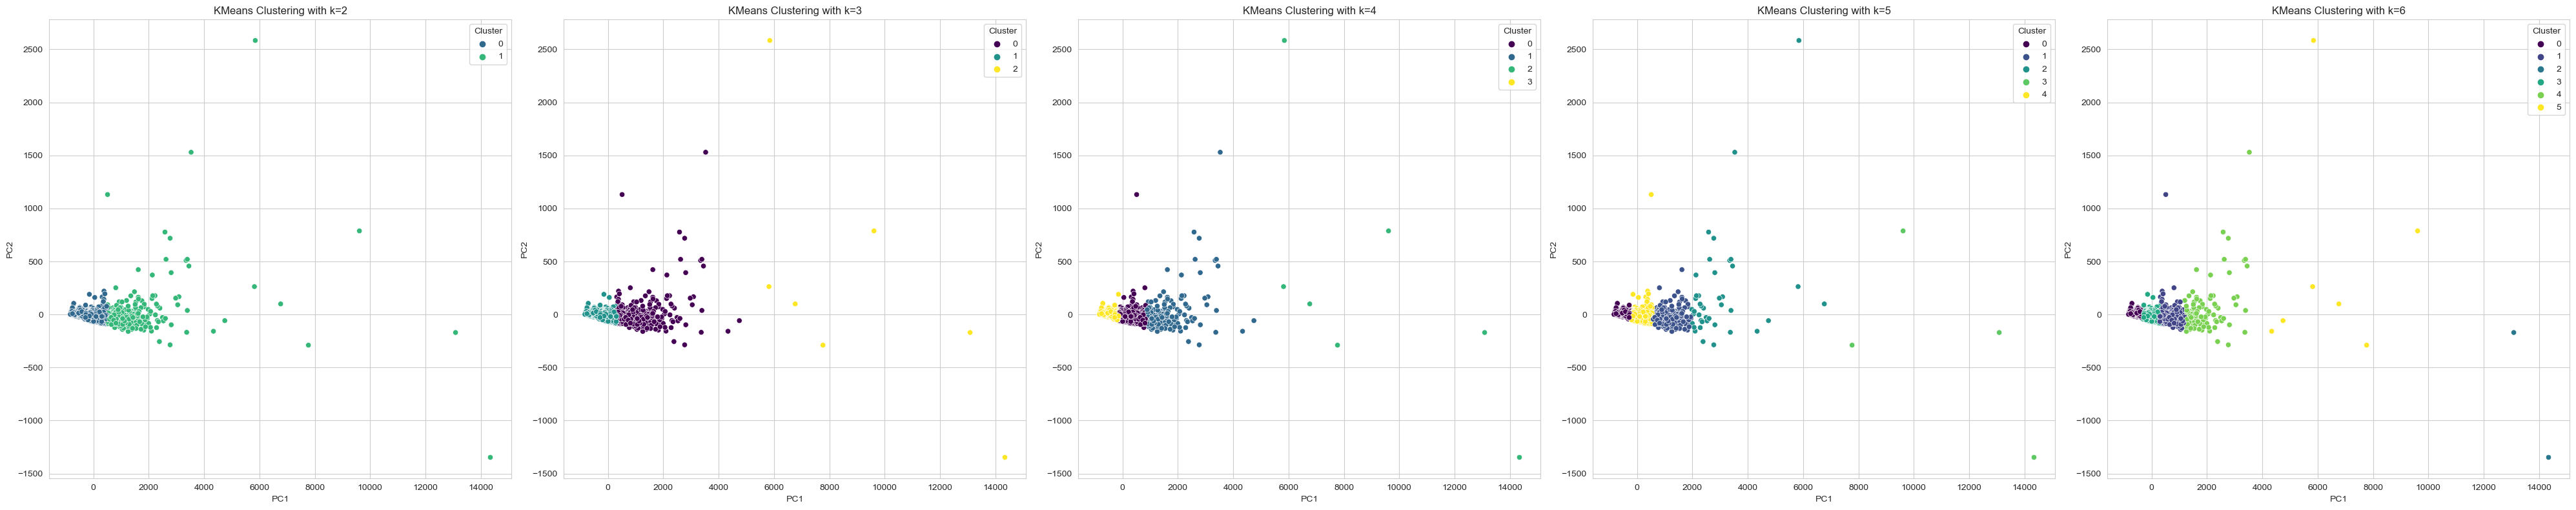

In [128]:
# Set up the subplots for side-by-side visualization
fig, axes = plt.subplots(1, 5, figsize=(40, 8))  # Adjust the figsize as needed

k_values = [2, 3, 4, 5, 6]

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_encoded)
    
    # Adding labels to our PCA-reduced dataframe
    principalDf['Cluster'] = kmeans.labels_
    
    # Visualize
    sns.scatterplot(data=principalDf, x='PC1', y='PC2', hue='Cluster', palette='viridis', ax=axes[idx])
    axes[idx].set_title(f'KMeans Clustering with k={k}')

plt.tight_layout()
plt.show()


In [79]:
# Merge our assigned clusters to our dataset
df_preprocessed['cluster'] = kmeans.labels_

In [81]:
# Summary stats
cluster_summary = df_preprocessed.groupby('cluster').mean()
print(cluster_summary)

           gender  admit_location  AdmitDiagnosis  insurance  NumCallouts  \
cluster                                                                     
0        0.547541        2.863388      563.067760   2.263388     0.067978   
1        0.540984        2.648712      554.081967   2.149883     0.120632   
2        0.500000        1.000000      413.500000   2.500000     0.035000   
3        0.581422        2.697248      560.169725   2.248853     0.141709   
4        0.544118        2.830882      603.073529   2.213235     0.021176   
5        0.571429        3.142857      684.285714   1.857143     0.000000   

         NumDiagnosis   NumProcs  AdmitProcedure  NumCPTevents    NumInput  \
cluster                                                                      
0            1.664426   0.434962      228.160656      0.730273    6.180667   
1            3.976253   1.092810      187.355972      1.495714   54.729204   
2            3.860000   5.570000      181.500000      8.035000  286.800

Individual features by cluster

In [84]:
# NumDiagnosis
avg_diagnosis = df_preprocessed.groupby('cluster')['NumDiagnosis'].mean()
print(avg_diagnosis)

cluster
0     1.664426
1     3.976253
2     3.860000
3     1.996560
4     7.698235
5    65.530000
Name: NumDiagnosis, dtype: float64


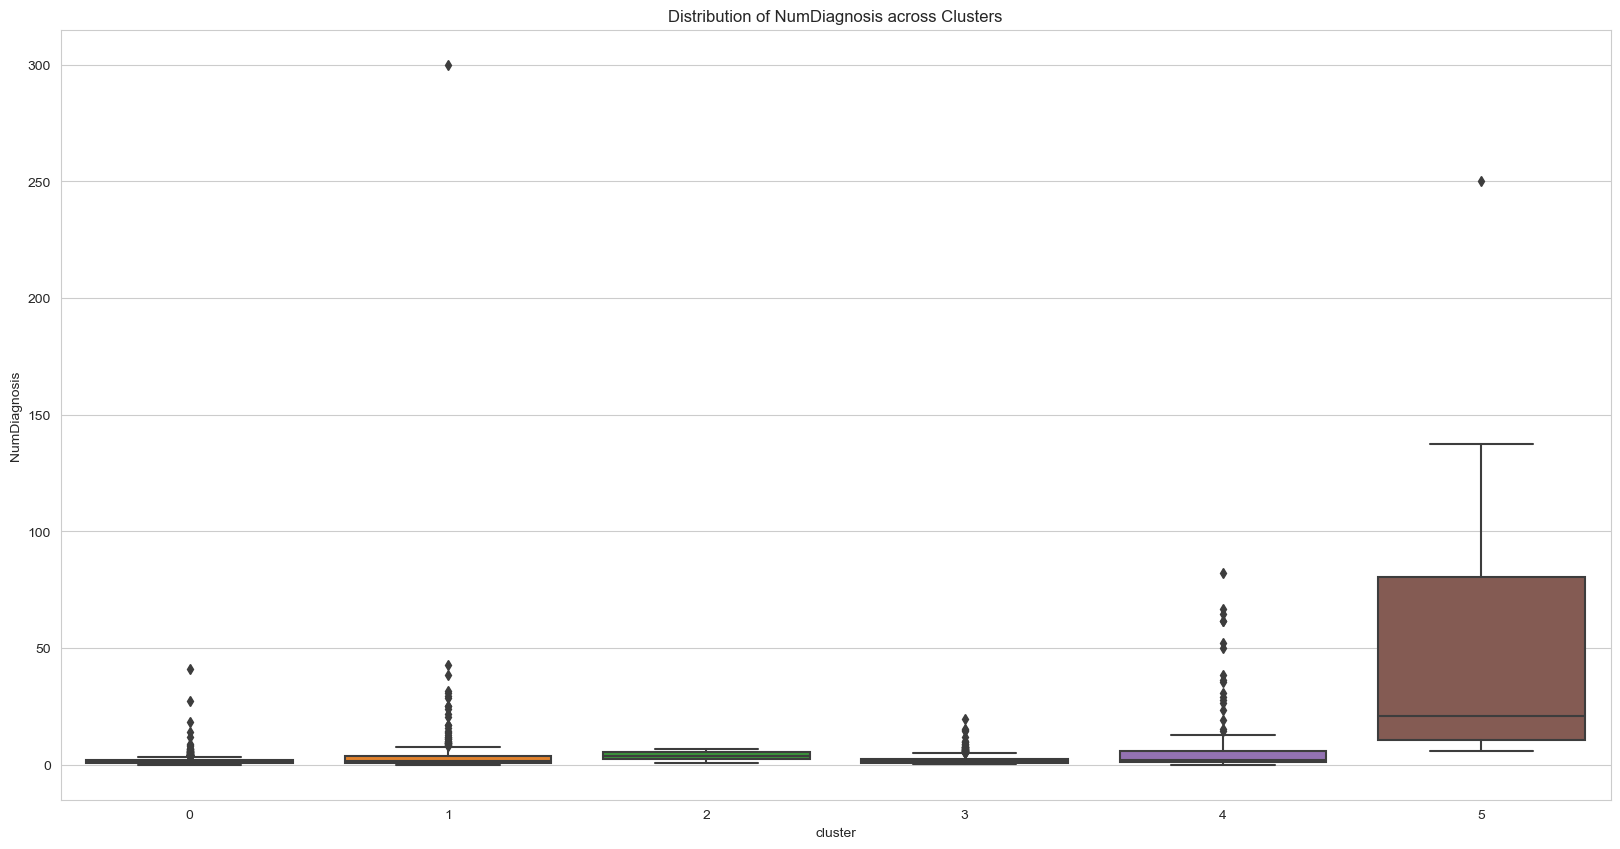

In [88]:
sns.boxplot(data=df_preprocessed, x='cluster', y='NumDiagnosis')
plt.title("Distribution of NumDiagnosis across Clusters")
plt.show()

In [86]:
# AdmitLocation
common_admit_location = df_preprocessed.groupby('cluster')['admit_location'].agg(lambda x: x.value_counts().index[0])
print(common_admit_location)


cluster
0    2
1    2
2    1
3    2
4    2
5    5
Name: admit_location, dtype: int64


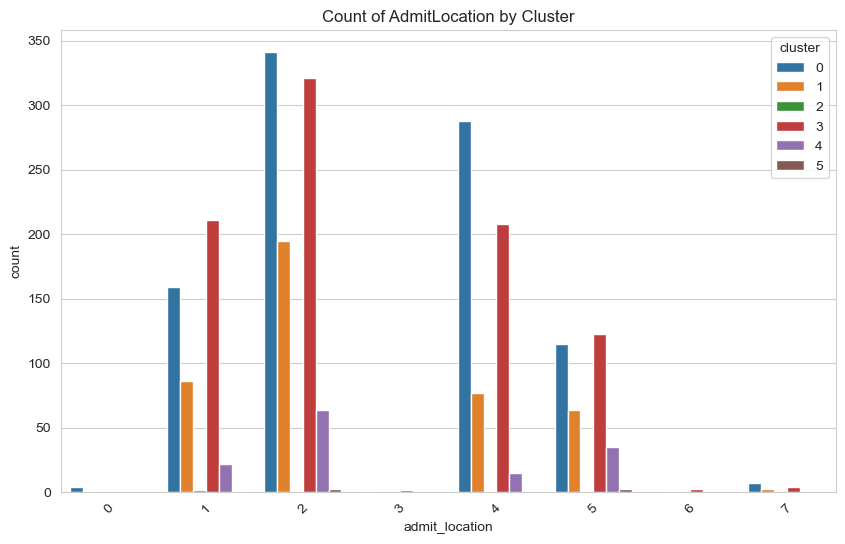

In [90]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_preprocessed, x='admit_location', hue='cluster')
plt.title("Count of AdmitLocation by Cluster")
plt.xticks(rotation=45)
plt.show()

In [106]:
# age

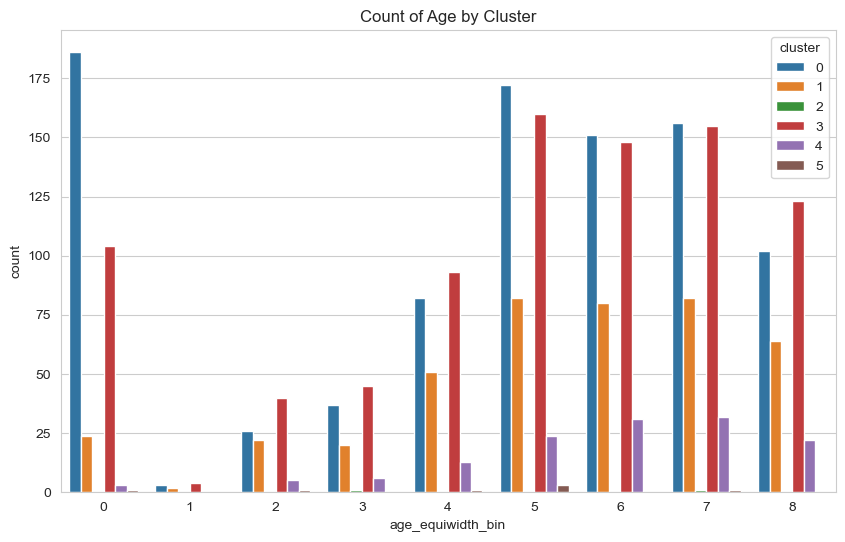

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_preprocessed, x='age_equiwidth_bin', hue='cluster')
plt.title("Count of Age by Cluster")
plt.xticks(rotation=0)
plt.show()

Lets run visualisations on all of our data.

In [91]:
# First we seperate our numeric and categorical columns
numeric_cols = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_preprocessed.select_dtypes(include=['object']).columns

IndexError: index 4 is out of bounds for axis 0 with size 4

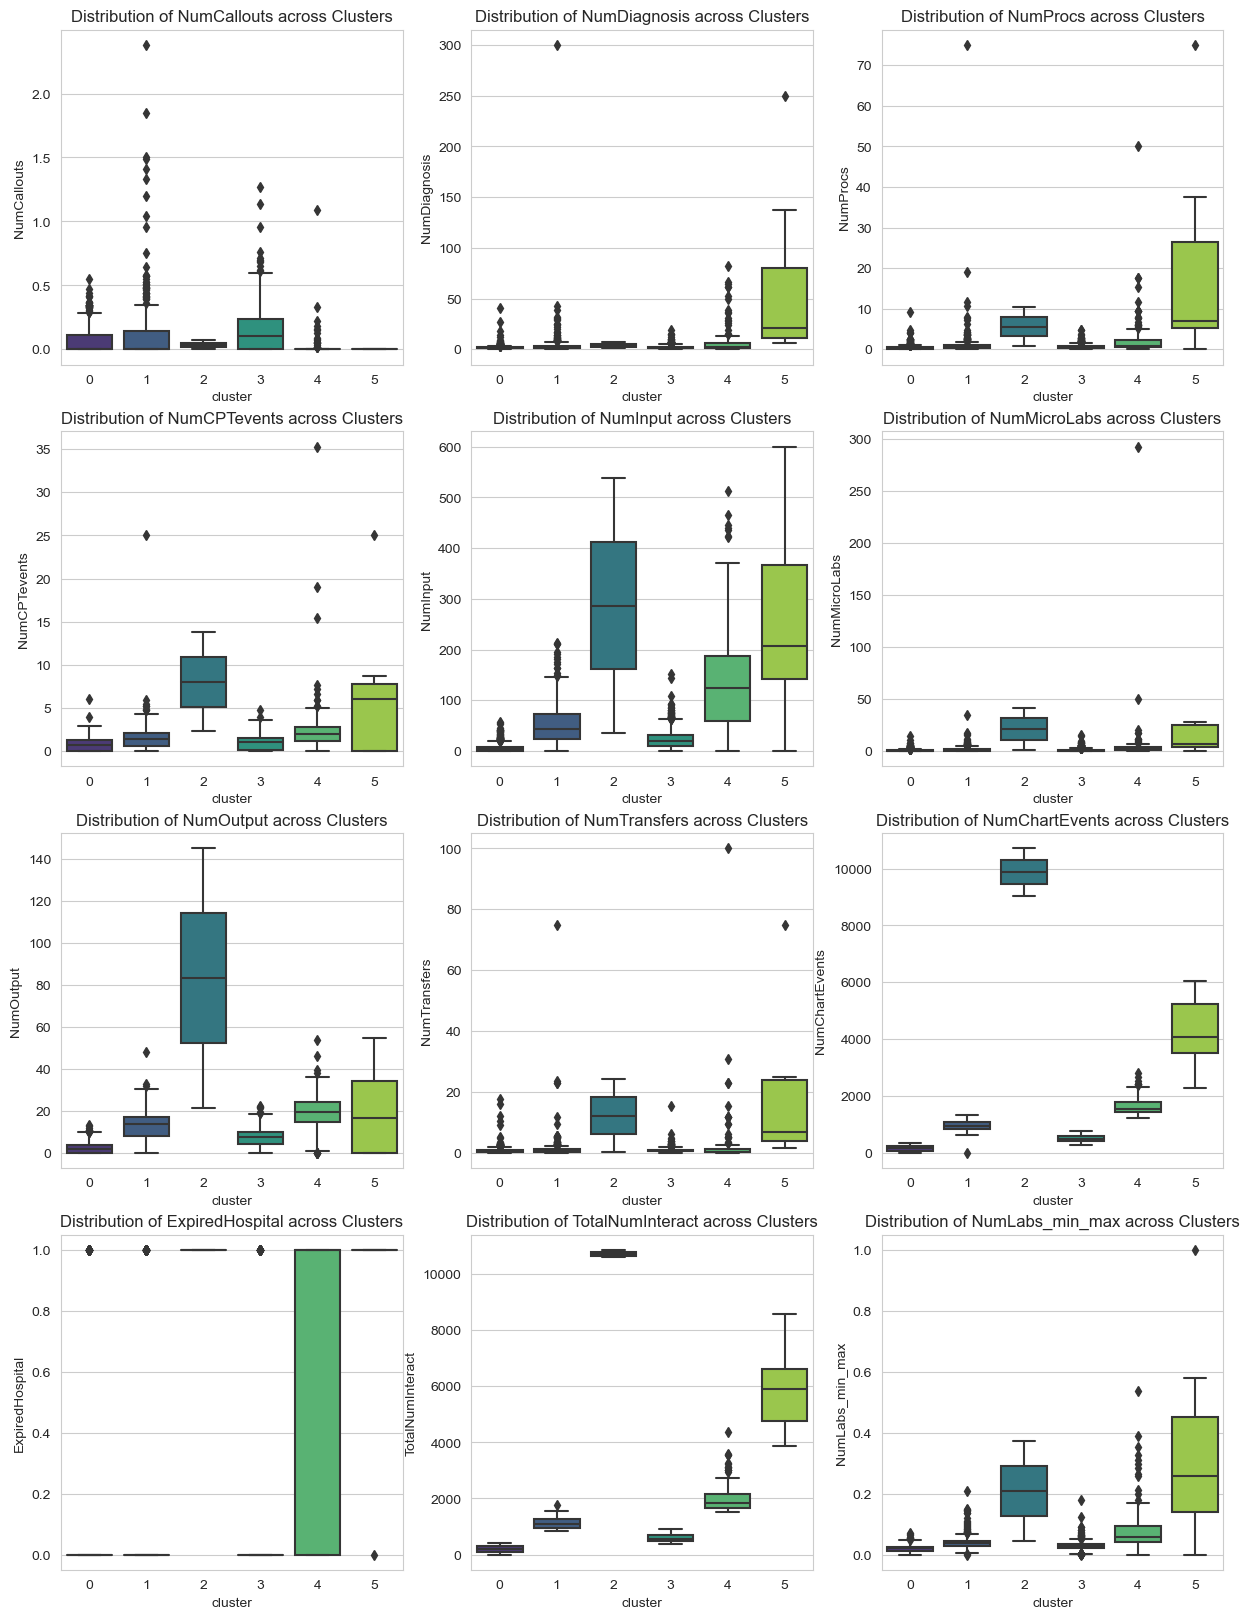

In [104]:
# Visualise our numeric columns


# Setting up the grid for subplots
n_plots = len(numeric_cols) - 1  # Excluding 'cluster' column
n_cols = 3
n_rows = int(np.ceil(n_plots / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, current_col in enumerate([c for c in numeric_cols if c != 'cluster']):
    row = i // n_cols
    col = i % n_cols
    
    if n_rows == 1:
        ax = axs[col]
    else:
        ax = axs[row, col]
    
    # Using viridis palette for the boxplot
    sns.boxplot(data=df_preprocessed, x='cluster', y=current_col, ax=ax, palette='viridis')
    ax.set_title(f"Distribution of {current_col} across Clusters")
    
# Remove any unused subplots
for j in range(i+1, n_rows * n_cols):
    if n_rows == 1:
        axs[j].set_visible(False)
    else:
        axs.flatten()[j].set_visible(False)

plt.tight_layout()
plt.show()


In [94]:
# Visualise our categorical columns
for col in categorical_cols:
    if col != "cluster":  # We don't want to plot the cluster column
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df_preprocessed, x=col, hue='cluster')
        plt.title(f"Count of {col} by Cluster")
        plt.xticks(rotation=45)
        plt.legend(title='Cluster', loc='upper right')
        plt.show()

Oops we don't have categorical as we've encoded all columns.

<b>Interpretation of Numerical Data from Clustering</b>

Clusters of Interest:

- Cluster 5

- Cluster 4

- Cluster 2

In [105]:
print(df_preprocessed.columns)

Index(['gender', 'admit_location', 'AdmitDiagnosis', 'insurance',
       'NumCallouts', 'NumDiagnosis', 'NumProcs', 'AdmitProcedure',
       'NumCPTevents', 'NumInput', 'NumMicroLabs', 'NumOutput', 'NumTransfers',
       'NumChartEvents', 'ExpiredHospital', 'TotalNumInteract',
       'age_equiwidth_bin', 'NumLabs_min_max', 'LOSdays_category',
       'binarised_marital_status', 'cluster'],
      dtype='object')


<h2>Summary Stats Continued</h2>

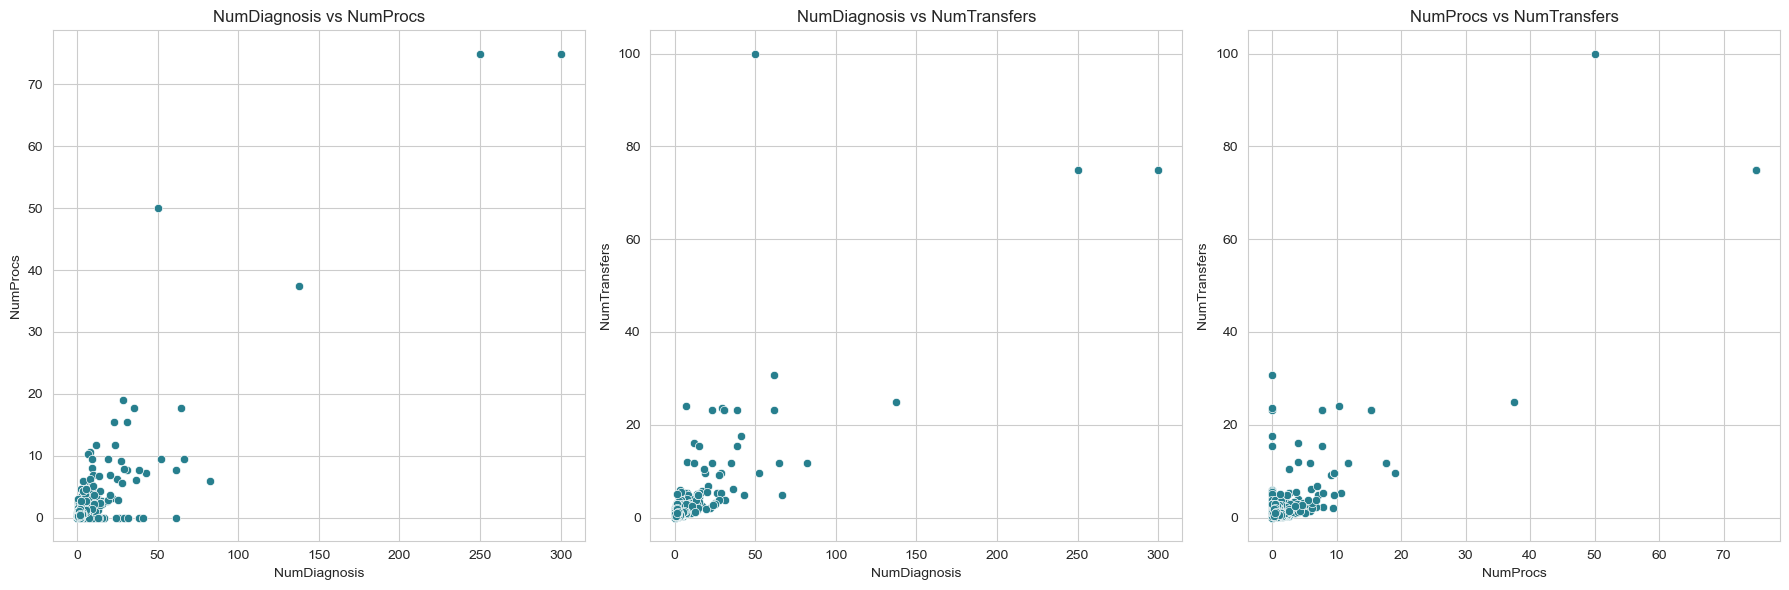

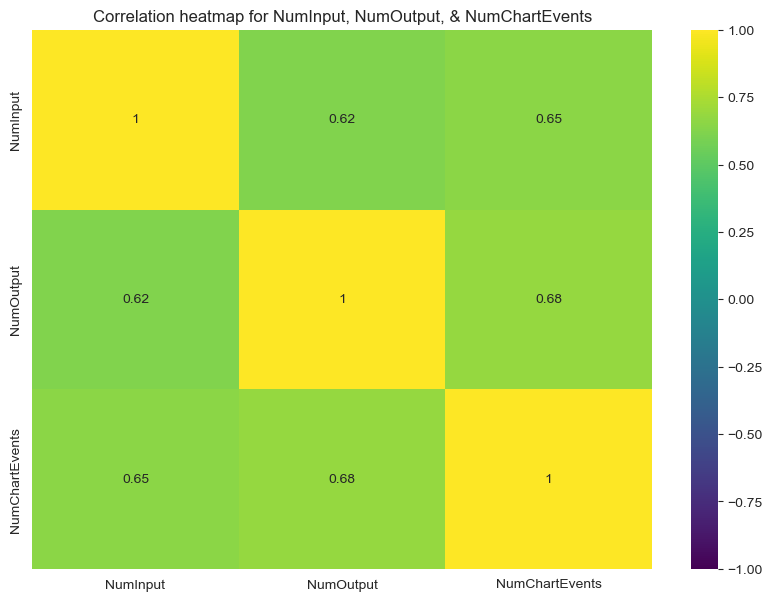

In [120]:
# Set up the matplotlib figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Choose a color from the viridis palette for scatter plots
scatter_color = sns.color_palette("viridis")[2]

# Scatter plot for NumDiagnosis vs NumProcs
sns.scatterplot(x='NumDiagnosis', y='NumProcs', data=df_preprocessed, ax=axs[0], color=scatter_color)
axs[0].set_title('NumDiagnosis vs NumProcs')

# Scatter plot for NumDiagnosis vs NumTransfers
sns.scatterplot(x='NumDiagnosis', y='NumTransfers', data=df_preprocessed, ax=axs[1], color=scatter_color)
axs[1].set_title('NumDiagnosis vs NumTransfers')

# Scatter plot for NumProcs vs NumTransfers
sns.scatterplot(x='NumProcs', y='NumTransfers', data=df_preprocessed, ax=axs[2], color=scatter_color)
axs[2].set_title('NumProcs vs NumTransfers')

plt.tight_layout()
plt.show()

# Correlation heatmap for NumInput, NumOutput, & NumChartEvents
corr_features = ['NumInput', 'NumOutput', 'NumChartEvents']
corr_matrix = df_preprocessed[corr_features].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation heatmap for NumInput, NumOutput, & NumChartEvents')
plt.show()



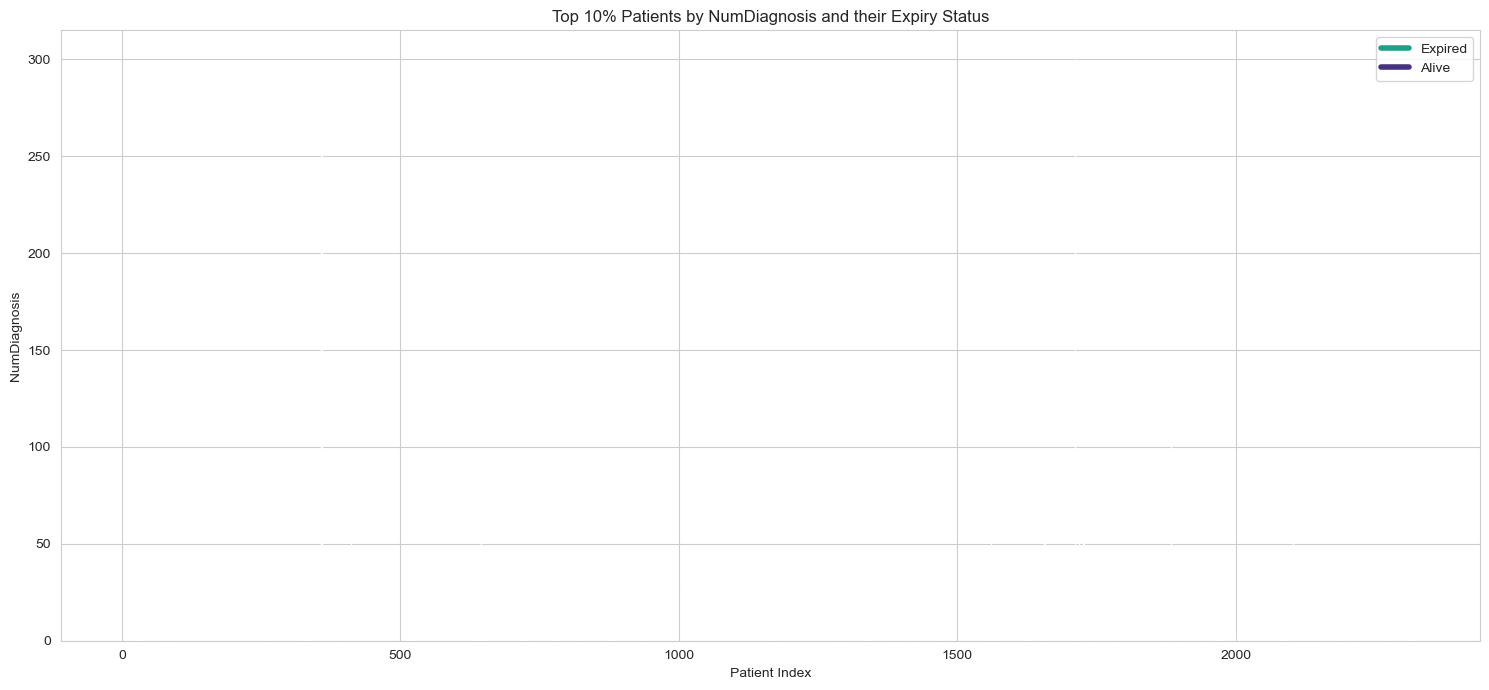

In [123]:
# Sort the dataframe by NumDiagnosis in descending order
df_sorted = df_preprocessed.sort_values(by='NumDiagnosis', ascending=False)

# Take the top 10% of records
top_percentage = 0.10
num_records = int(len(df_sorted) * top_percentage)
df_top = df_sorted.head(num_records)

# Define colors based on 'ExpiredHospital' column using list comprehension
colors = [sns.color_palette("viridis")[3] if x else sns.color_palette("viridis")[0] for x in df_top['ExpiredHospital']]

# Plotting
plt.figure(figsize=(15, 7))
bars = plt.bar(df_top.index, df_top['NumDiagnosis'], color=colors)
plt.xlabel('Patient Index')
plt.ylabel('NumDiagnosis')
plt.title('Top 10% Patients by NumDiagnosis and their Expiry Status')

# Creating a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=sns.color_palette("viridis")[3], lw=4, label='Expired'),
                   Line2D([0], [0], color=sns.color_palette("viridis")[0], lw=4, label='Alive')]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()
